In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma', n_colors=None, desat=None, color_codes=False)
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Description of the Diamonds Data set diamonds

>**Description of the all Attributes of dataset**

  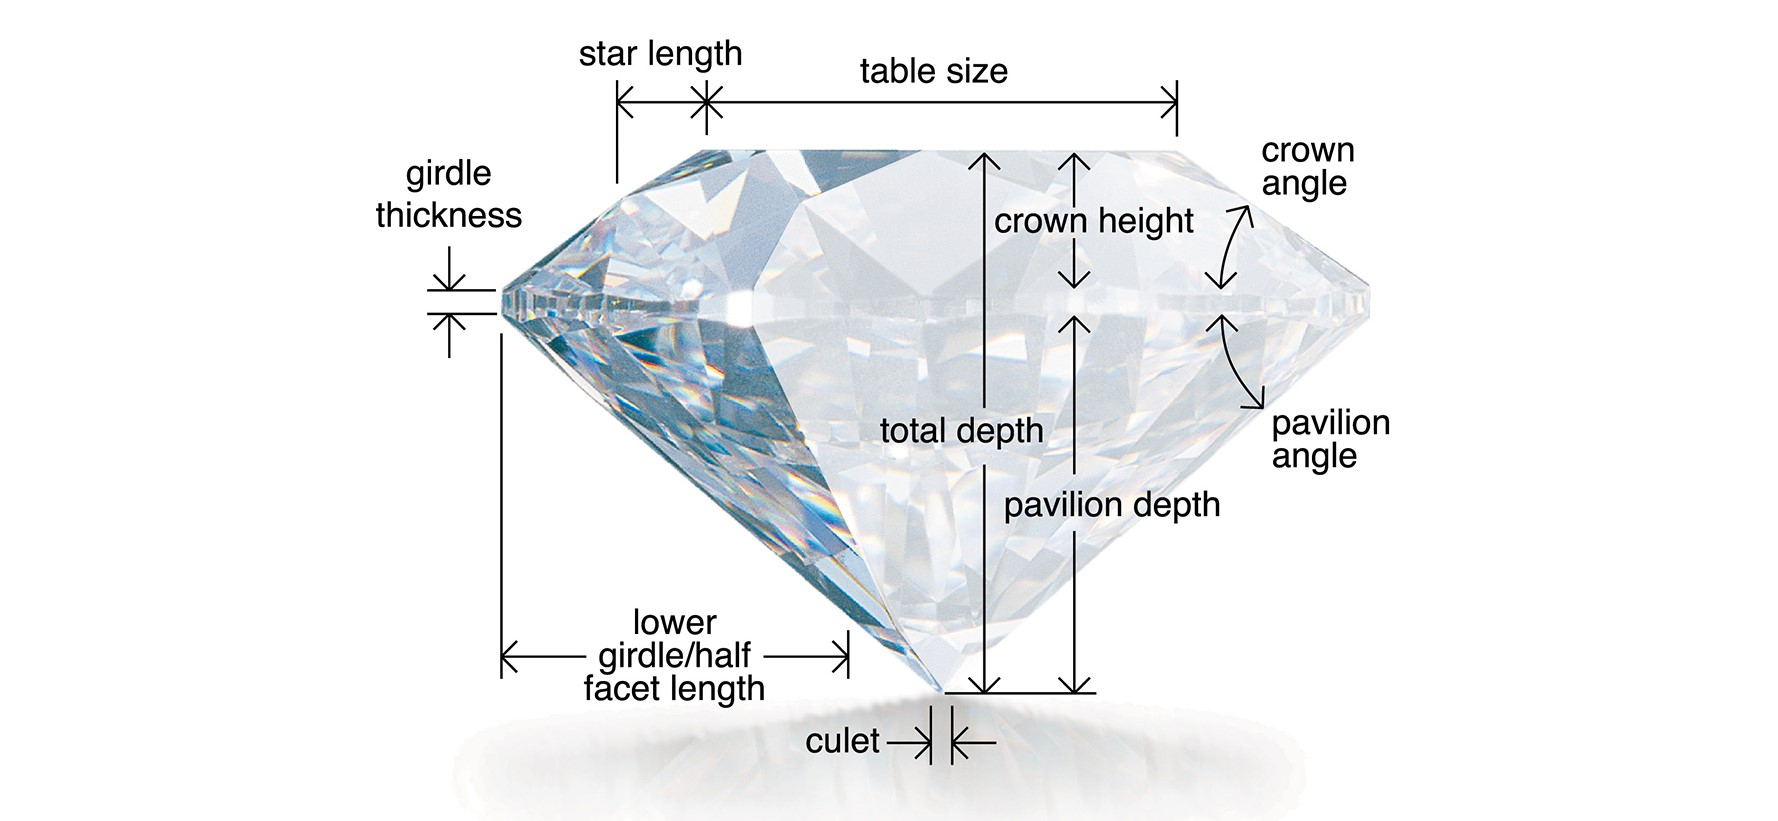

1.  **Cut** : It refers to one of the 10 or so most common diamond cuts. This dataset has an additional one called the 'Cushion Modified'.
  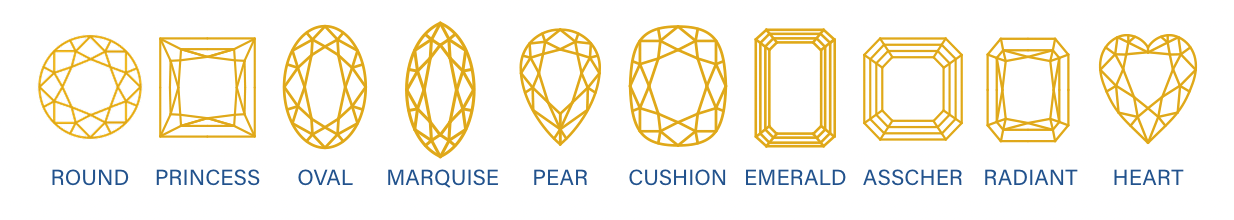
1.  **Color:** Indicates the color grade or hue of the gemstone, typically ranging from D (colorless) to Z (light yellow or brown) in the GIA color grading scale for diamonds.

      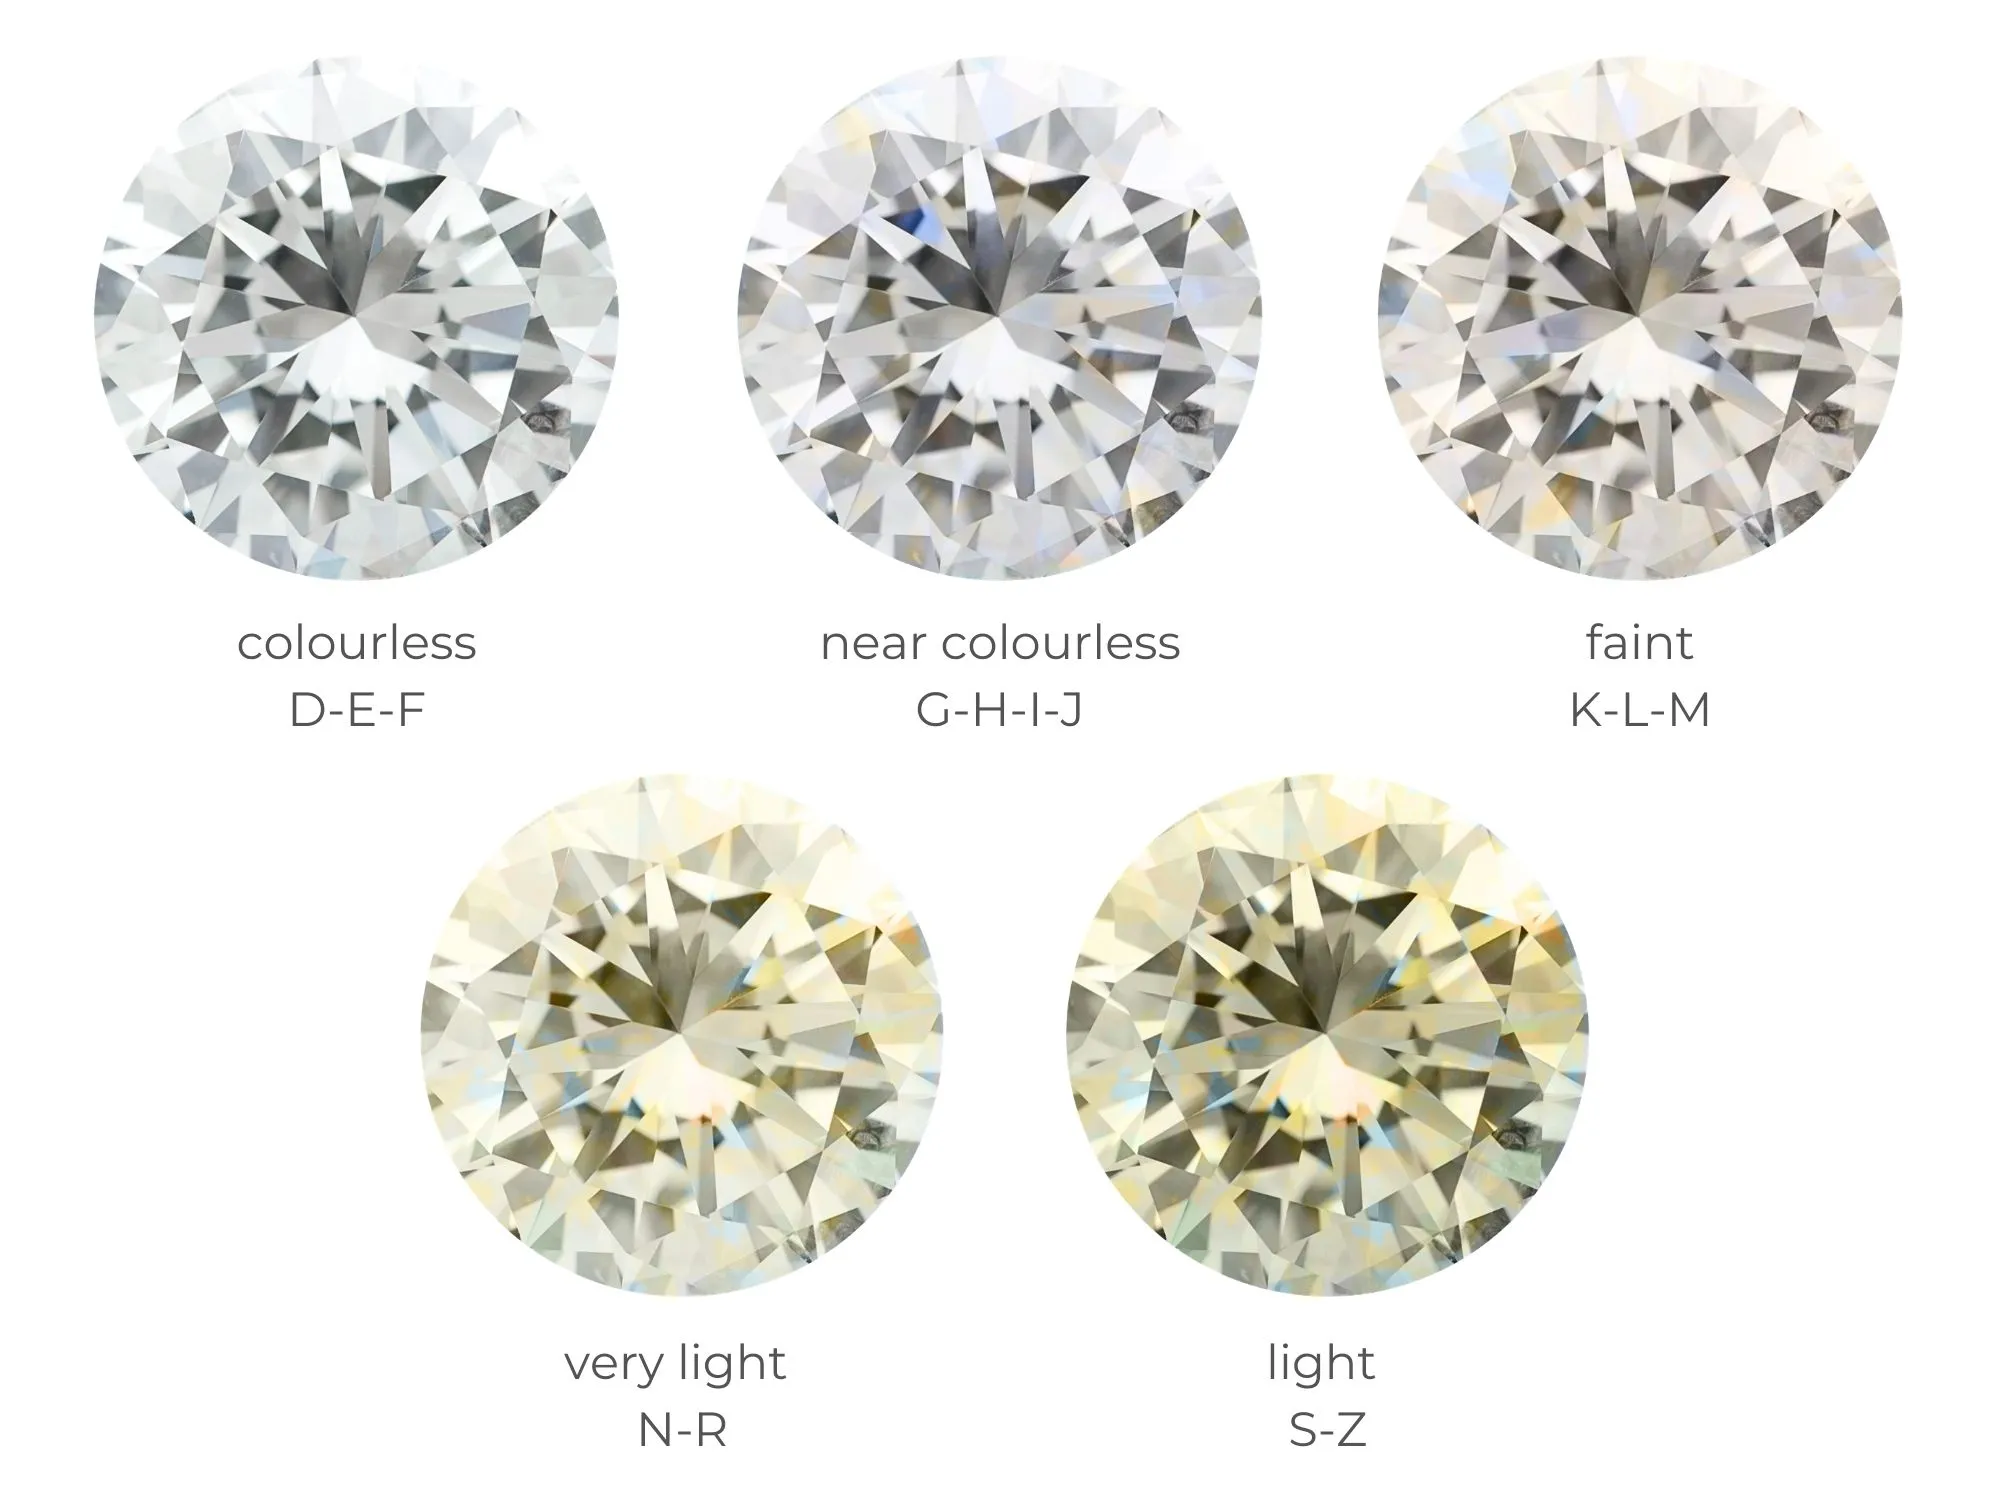

1. **Clarity:** Represents the level of clarity or purity of the gemstone, often graded from Flawless (no inclusions or blemishes) to Included (inclusions or blemishes visible to the naked eye) using GIA's clarity scale.

        It has following values...
        FL - Flawless
        IF - Internally Flawless
        VVS1/VVS2 - Very, Very Slightly Included
        VS1/VS2 - Very Slightly Included
        SI1/SI2 - Slightly Included
        I1/I2/I3 - Included
  clarity.avif

1. **Carat Weight:** Denotes the weight of the gemstone in carats, a standard unit of measurement for gemstones.

1. **Cut Quality:** A more detailed evaluation of the cut, which might include factors like proportions, angles, and other aspects that affect how the gemstone reflects light.

        The GIA assigns the cut of a diamond one of the following grades...
        Excellent (the best grade)
        Very Good
        Good
        Fair
        Poor (the worst grade)

1.  **Lab:** Indicates the laboratory or entity that has graded or certified the gemstone, such as GIA (Gemological Institute of America) or EGL (European Gemological Laboratory).

1. **Symmetry:** Reflects the symmetry of the gemstone's facets, which can influence its overall appearance.

          It has following values...
          Poor, Fair, .... , Very Good

1. **Polish:** Refers to the quality of the gemstone's surface finish, which can impact its luster and appearance.

1. **Eye Clean:** Indicates whether the gemstone appears clean to the naked eye, with no visible inclusions or blemishes.

        It has following values...
        Yes, No, Borderline, E1, unknown

1. **Culet Size:** Describes the size of the culet, a facet on the bottom of the gemstone.

  The GIA includes several different grades for culet size:
  None, Very Small, Small, Medium, Slightly Large, Large, Very Large, Extremely Large
  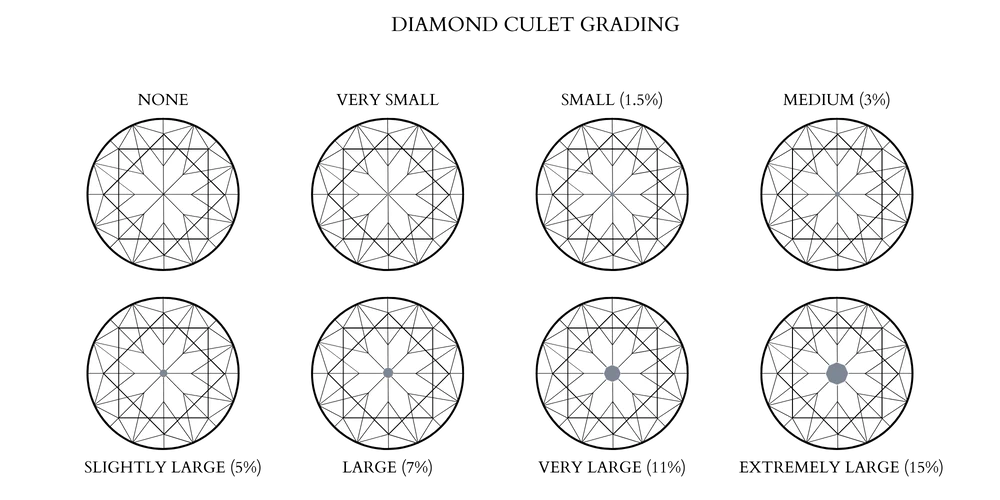

1. **Culet Condition:** Specifies the condition of the culet, which could be chipped or damaged etc.

        Values...
        unknown
        Abraded
        Chipped
        Pointed

1. **Depth Percent:** Represents the depth of the gemstone as a percentage of its overall dimensions.

1. **Table Percent:** Denotes the size of the flat facet on the top of the gemstone as a percentage of its overall dimensions.

1.  **Meas Length, Meas Width, Meas Depth:** The length, width, and depth measurements of the gemstone.

1. **Girdle Min, Girdle Max:** Refers to the minimum and maximum thickness of the girdle, which is the edge where the top and bottom parts of the gemstone meet.

      Girdle thickness is classified into categories ranging from extremely thin to extremely thick.

        In this dataset it has following values..
        M - Medium
        STK - Slightly Thick
        TN - Thin
        TK - Thick
        VTN - Very Thin
        VTK - Very Thick
        XTK - Extremely Thick
        XTN - Extremely Thin
  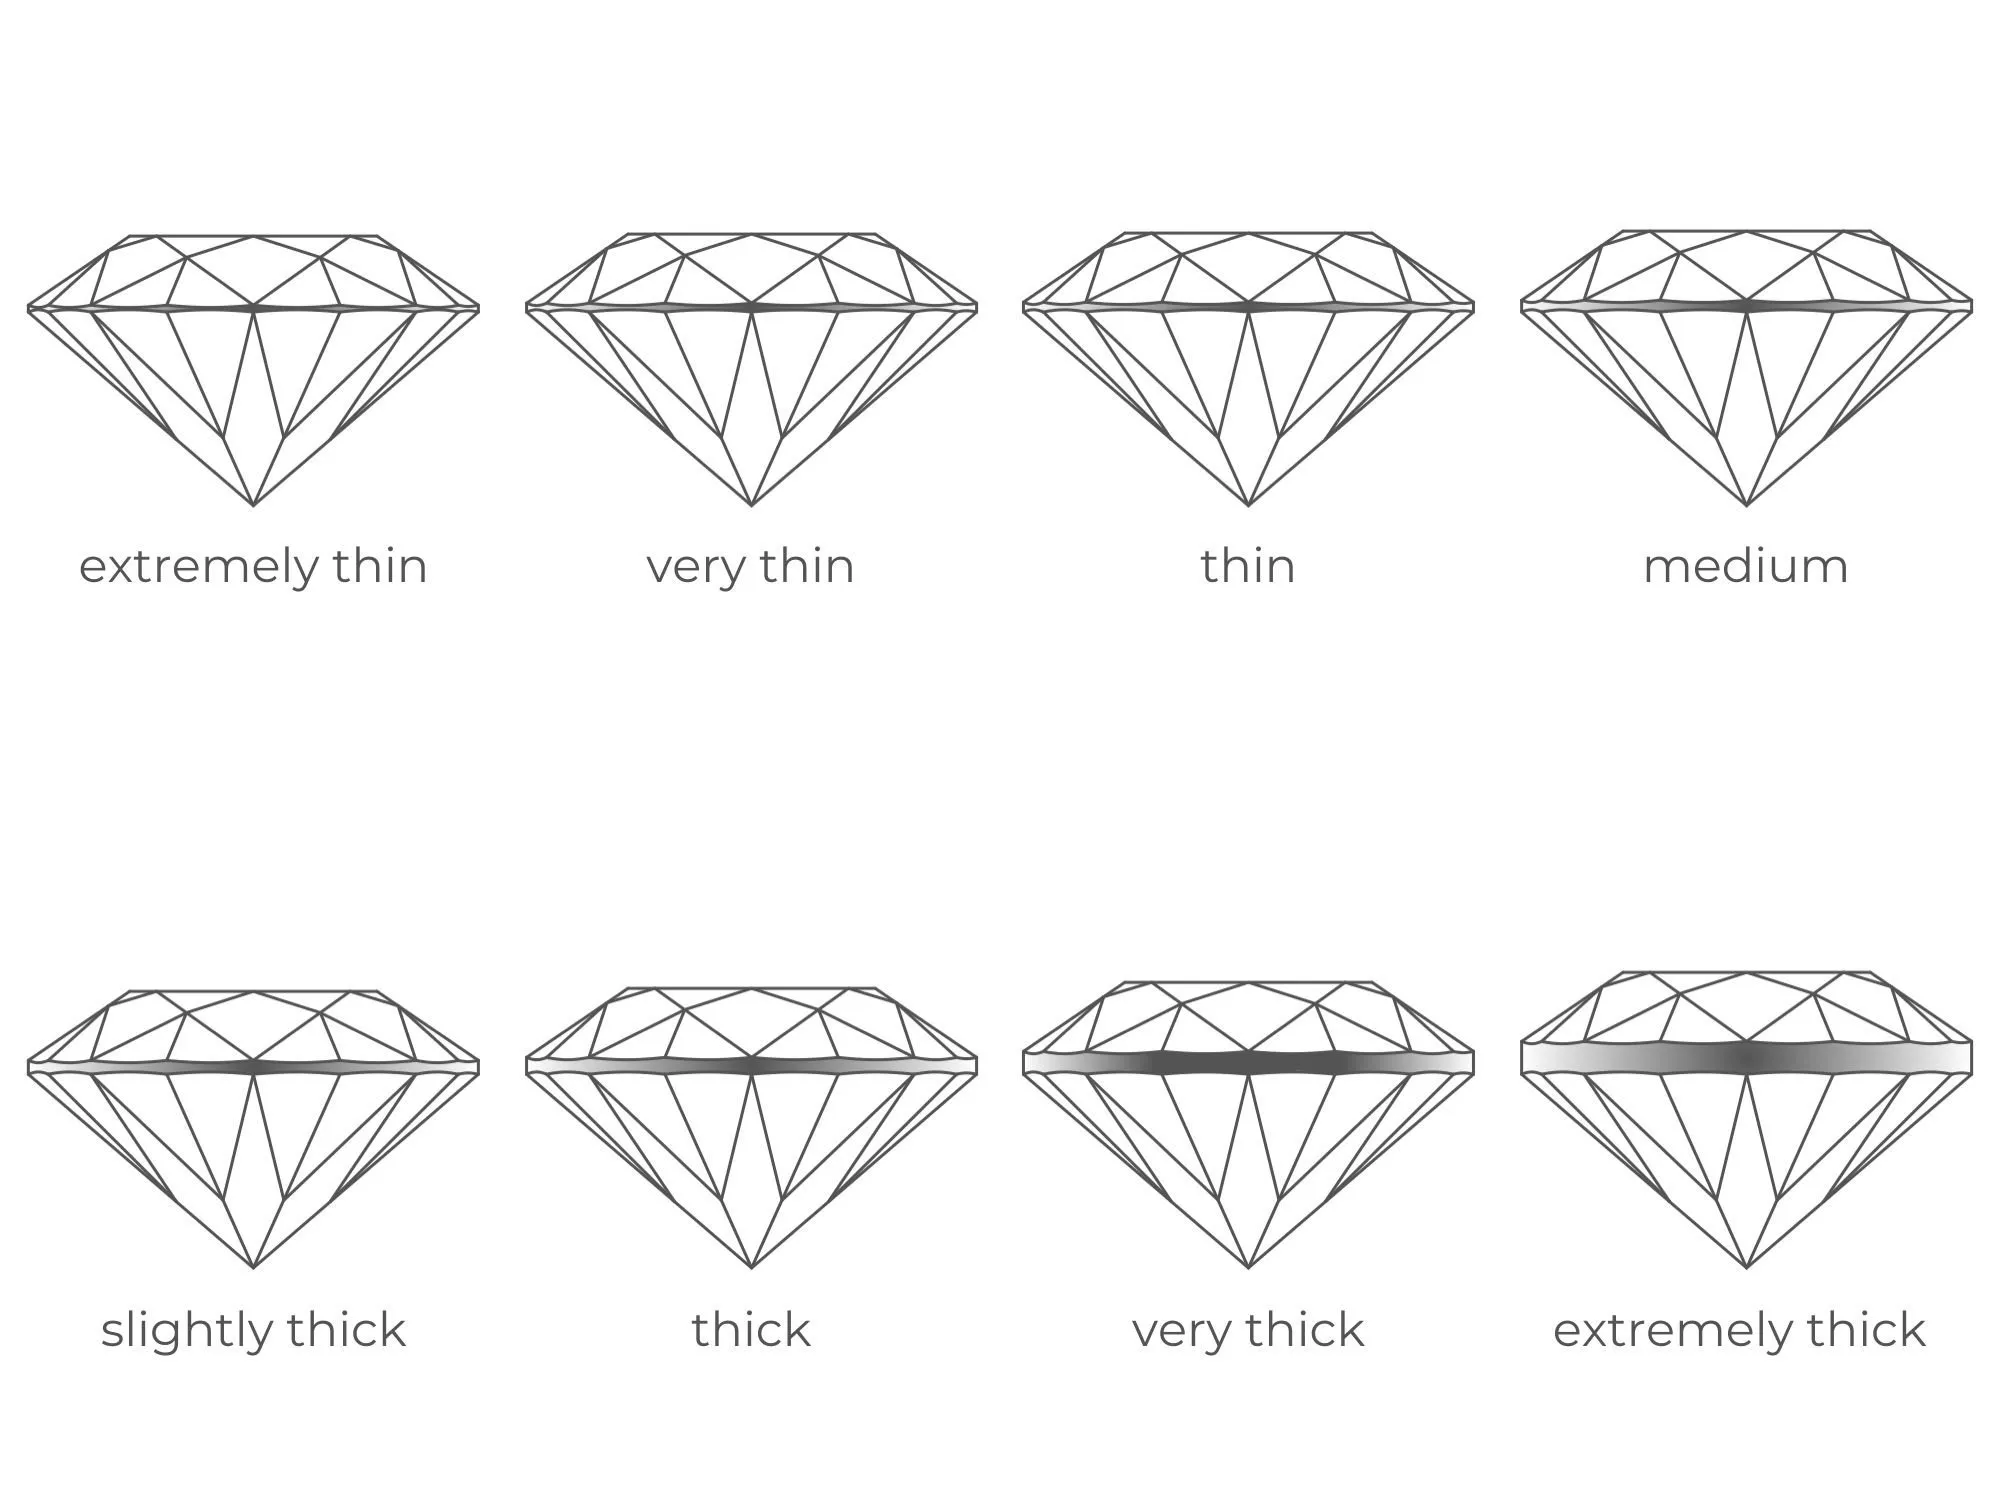

1. **Fluor Color and Fluor Intensity:** Describes any fluorescence observed in the gemstone under ultraviolet (UV) light,including the color and the intensityfluorscence.

  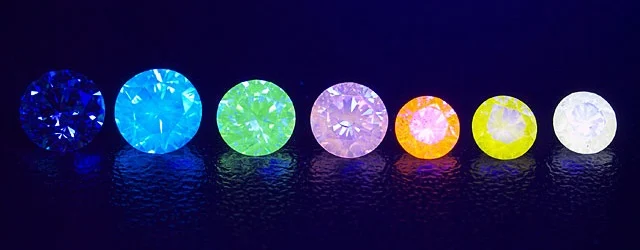
  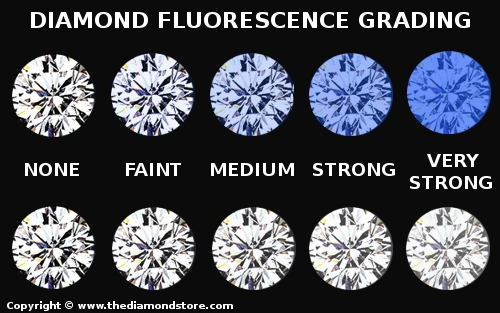
1. **Fancy Color Dominant Color and Secondary Color:** Applicable if the gemstone is a fancy colored diamond, indicating the primary and secondary colors present.

1. **Fancy Color Intensity:** Specifies the intensity or saturation of the fancy color.

        Values...
        Fancy
        Very Light
        Faint
        Fancy Light
        Light
        Fancy Deep
        Fancy Intense
        Fancy Dark
        Fancy Vivid

1. **Total Sales Price:** Represents the total price or value of the gemstone in a given transaction or context
      


#Understanding of data and Exploratary Data Analysis

In [2]:
df = pd.read_csv('diamonds.csv')
df.drop('Unnamed: 0', axis=1,inplace=True) #Removing first column
df.head()

cut color clarity  carat_weight cut_quality  lab   symmetry     polish  \
0  Round     E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   
1  Round     E    VVS2          0.09   Very Good  IGI  Very Good  Very Good   
2  Round     E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   
3  Round     E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   
4  Round     E    VVS2          0.09   Very Good  IGI  Very Good  Excellent   

  eye_clean culet_size  ... meas_depth  girdle_min  girdle_max  fluor_color  \
0   unknown          N  ...       1.79           M           M      unknown   
1   unknown          N  ...       1.78         STK         STK      unknown   
2   unknown    unknown  ...       1.77          TN           M      unknown   
3   unknown    unknown  ...       1.78           M         STK      unknown   
4   unknown          N  ...       1.82         STK         STK      unknown   

   fluor_intensity  fancy_color_dominant_color fancy_color_secondary_color  \
0             None                     unknown                     unknown   
1             None                     unknown                     unknown   
2             None                     unknown                     unknown   
3             None                     unknown                     unknown   
4             None                     unknown                     unknown   

  fancy_color_overtone fancy_color_intensity total_sales_price  
0              unknown               unknown               200  
1              unknown               unknown               200  
2              unknown               unknown               200  
3              unknown               unknown               200  
4              unknown               unknown               200  

[5 rows x 25 columns]

>Format of this function : Number of rows * Number of columns

In [3]:
df.size

5492575

>Format of this function : (Numbers of rows,Number of columns)

In [4]:
df.shape

(219703, 25)

>It is describing data type And showing count of Non-NULL values of every columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

> Showing count of Null values of every Count.

In [6]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

>It will show summary of data which is numeric data type
For example : Mean,Max,Min,etc.



In [7]:
df.describe()

carat_weight  depth_percent  table_percent    meas_length  \
count  219703.000000  219703.000000  219703.000000  219703.000000   
mean        0.755176      61.683768      57.747585       5.548853   
std         0.845894       9.915266       9.959928       1.763924   
min         0.080000       0.000000       0.000000       0.000000   
25%         0.310000      61.200000      57.000000       4.350000   
50%         0.500000      62.400000      58.000000       5.060000   
75%         1.000000      63.500000      60.000000       6.350000   
max        19.350000      98.700000      94.000000      93.660000   

          meas_width     meas_depth  total_sales_price  
count  219703.000000  219703.000000       2.197030e+05  
mean        5.135626       3.285699       6.908062e+03  
std         1.374529       2.054822       2.595949e+04  
min         0.000000       0.000000       2.000000e+02  
25%         4.310000       2.680000       9.580000e+02  
50%         4.800000       3.030000       1.970000e+03  
75%         5.700000       3.630000       5.207000e+03  
max        62.300000      76.300000       1.449881e+06

>It will show summary of data which is object(string) type


In [8]:
df.describe(include='O').T

count unique        top    freq
cut                          219703     11      Round  158316
color                        219703     11          E   33103
clarity                      219703     11        SI1   38627
cut_quality                  219703      6  Excellent  124861
lab                          219703      3        GIA  200434
symmetry                     219703      5  Excellent  131619
polish                       219703      5  Excellent  175806
eye_clean                    219703      5    unknown  156916
culet_size                   219703      9          N  131899
culet_condition              219703      4    unknown  204384
girdle_min                   219703     10    unknown   83432
girdle_max                   219703     10    unknown   84295
fluor_color                  219703      6    unknown  203977
fluor_intensity              219703      8       None  143491
fancy_color_dominant_color   219703     13    unknown  210539
fancy_color_secondary_color  219703     11    unknown  218641
fancy_color_overtone         219703      9    unknown  217665
fancy_color_intensity        219703     10    unknown  210541

>Listing Columns Who has Object DataType

In [9]:
categorical_columns = [feature for feature in df.columns if df[feature].dtypes =='O']
categorical_columns

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

>Listing Columns Who has Numeric DataType and removing Total_Price from feature

In [10]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes !='O']
numerical_columns.pop(-1)
features=numerical_columns+categorical_columns
features

['carat_weight',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

>Let's see graph between every Numeric feartures. And Those can in future assumption can help in futer process.

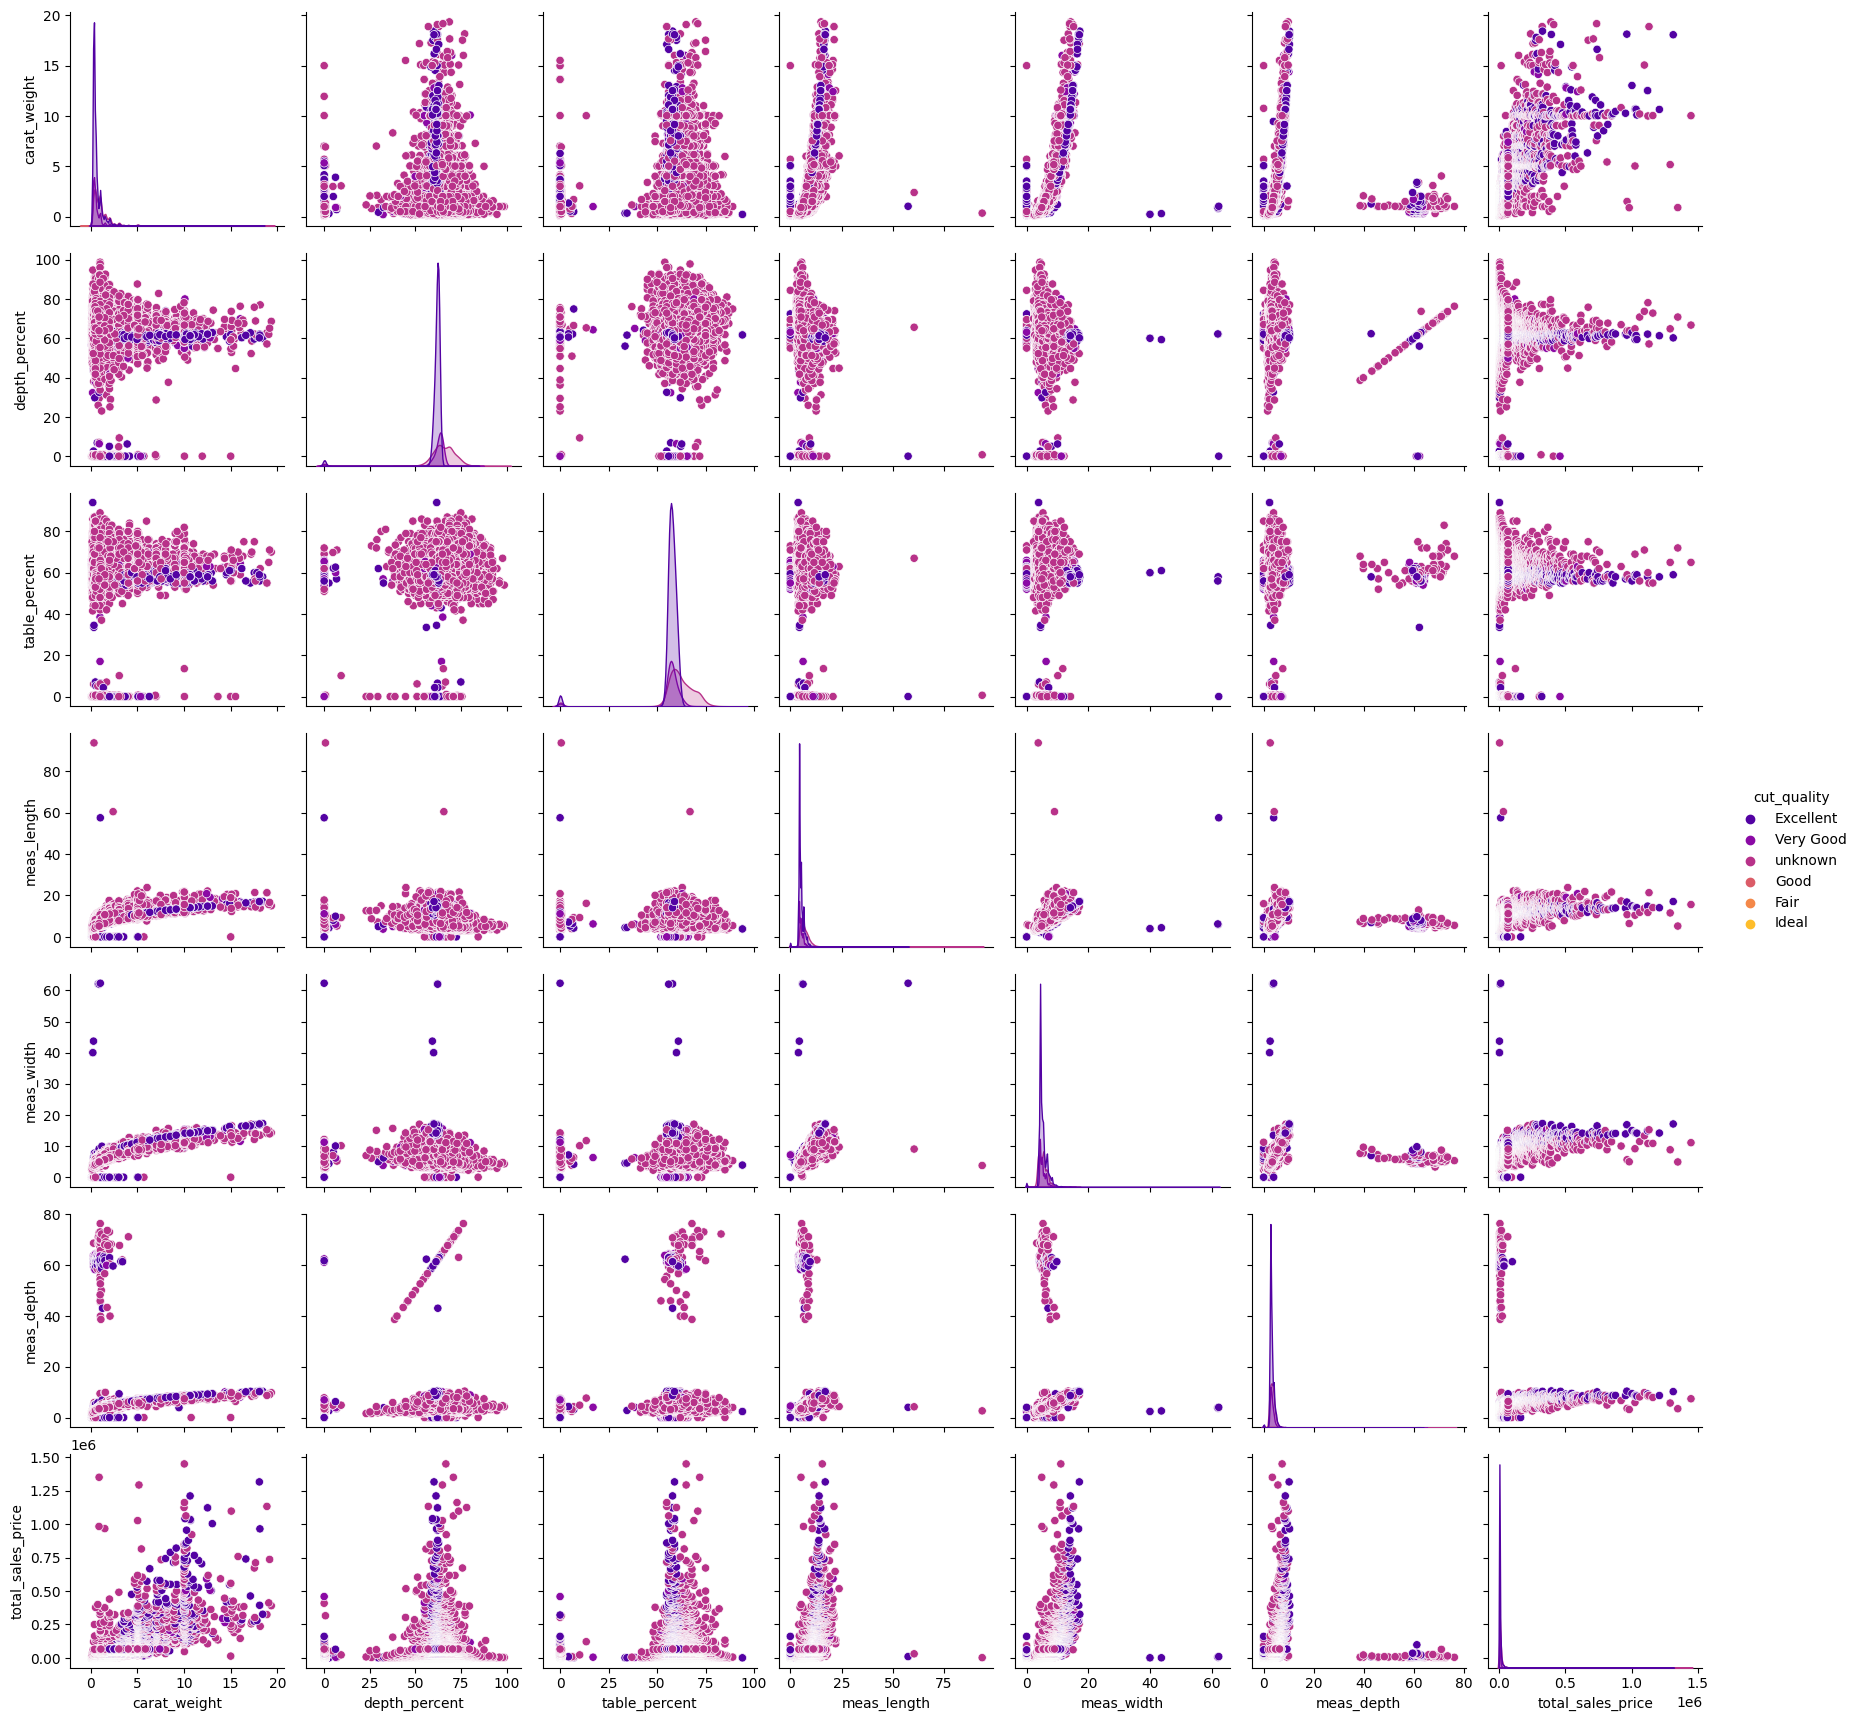

In [11]:
sns.pairplot(df, hue= "cut_quality" )

>Some of the realtions are in linear Relation and some of are in Polinomial Relation.

>In the below there is categorical plot of kind strip which helps to visualize data in more efficient. It will show every data in graph.

cut:


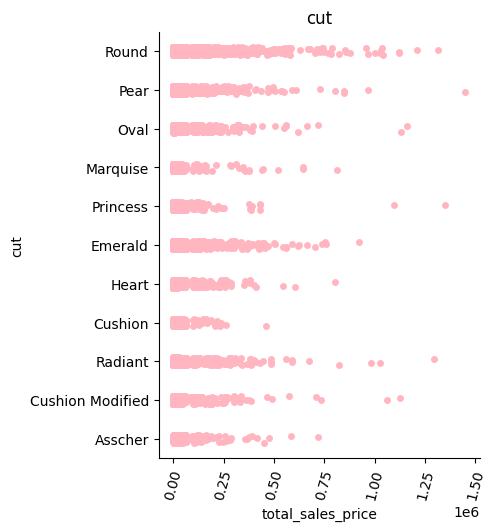

color:


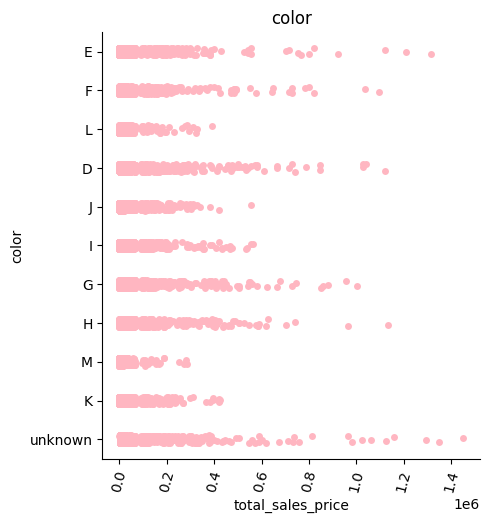

clarity:


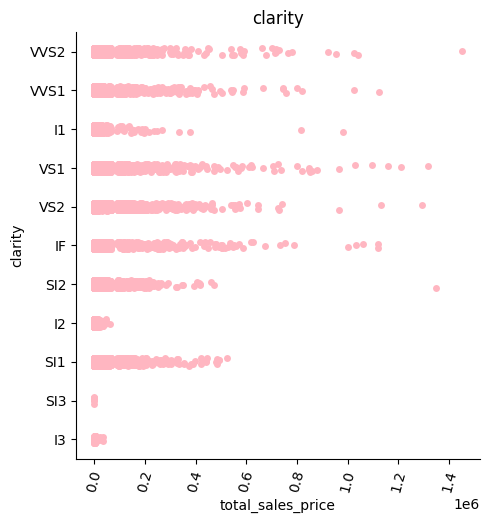

cut_quality:


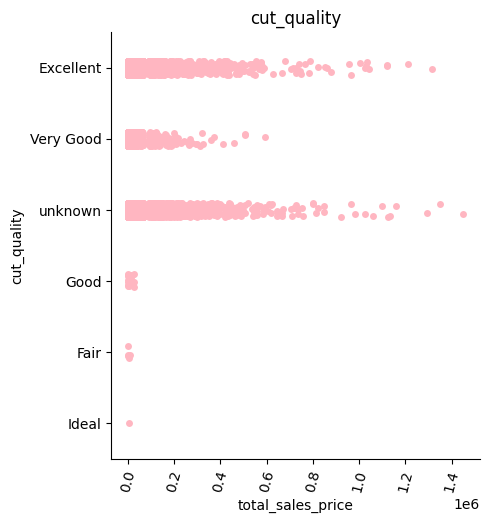

lab:


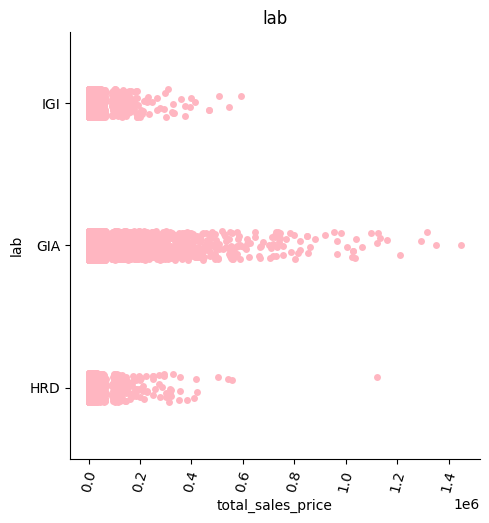

symmetry:


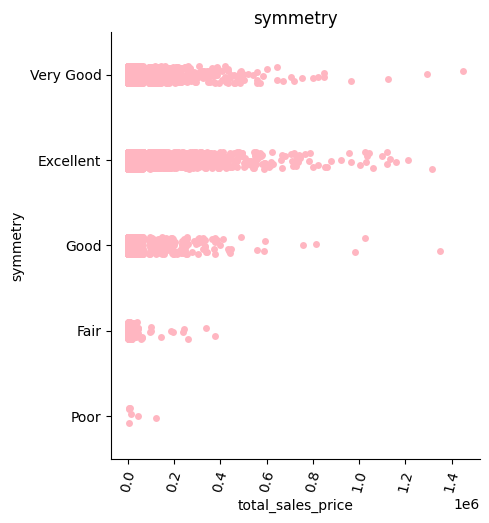

polish:


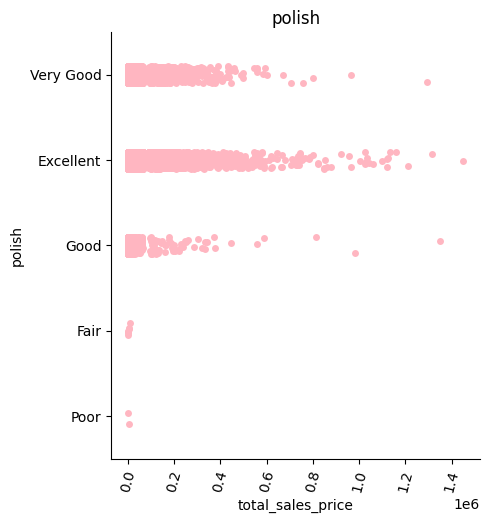

eye_clean:


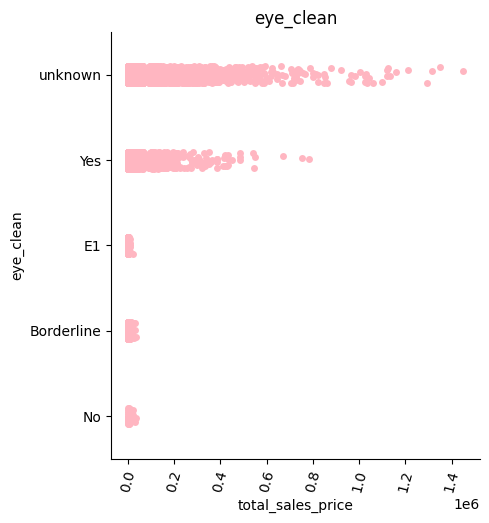

culet_size:


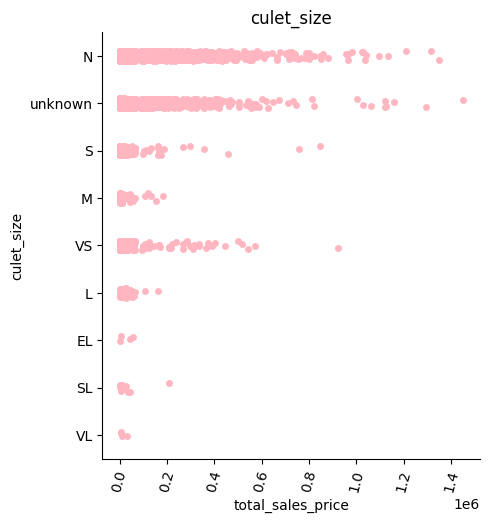

culet_condition:


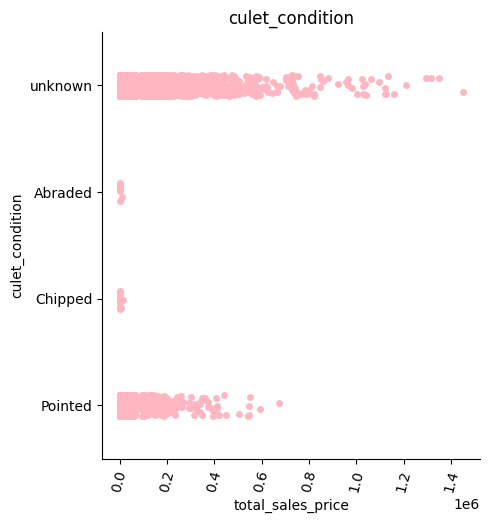

girdle_min:


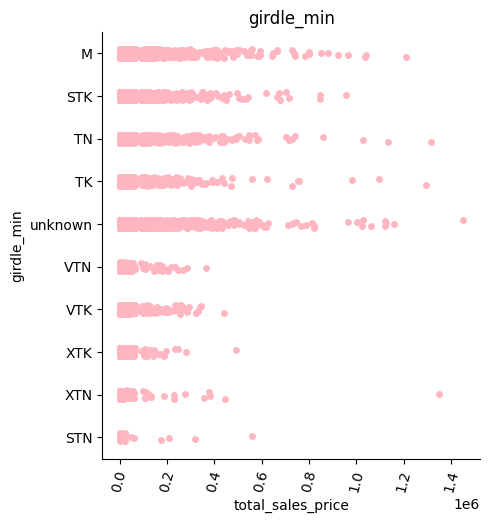

girdle_max:


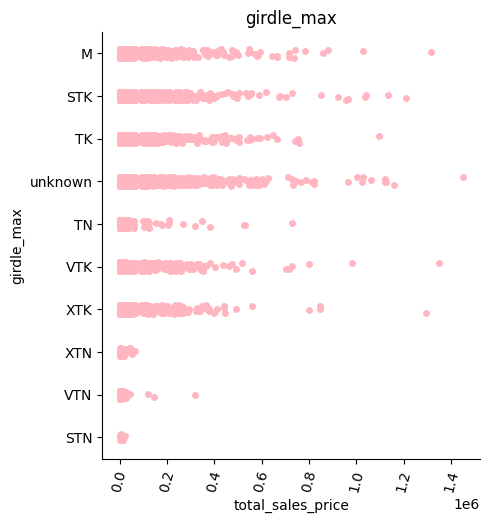

fluor_color:


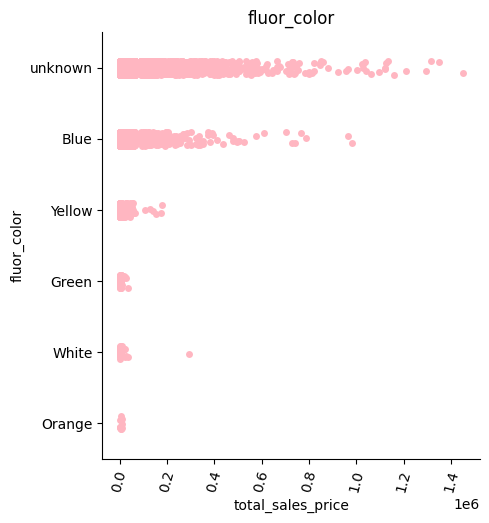

fluor_intensity:


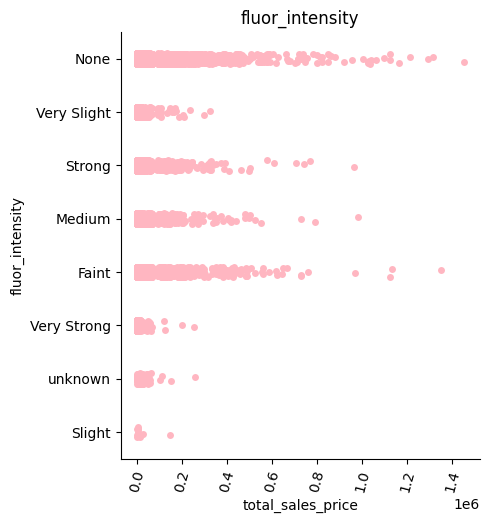

fancy_color_dominant_color:


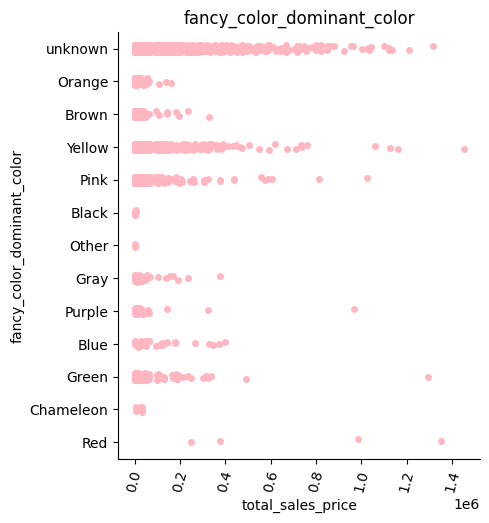

fancy_color_secondary_color:


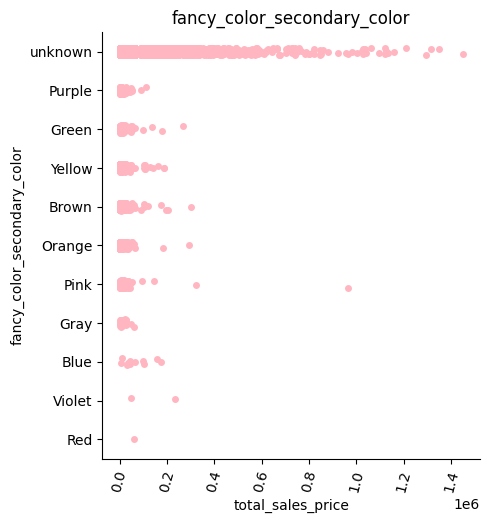

fancy_color_overtone:


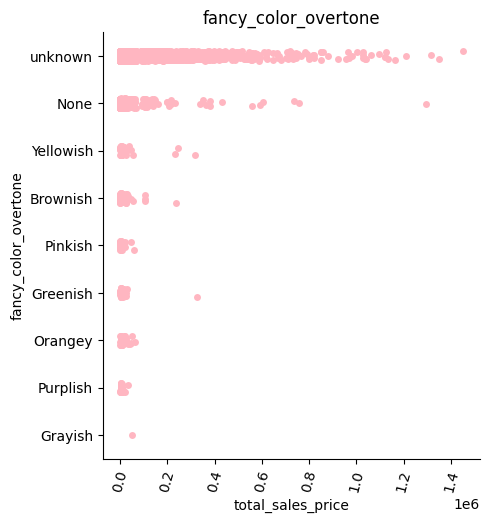

fancy_color_intensity:


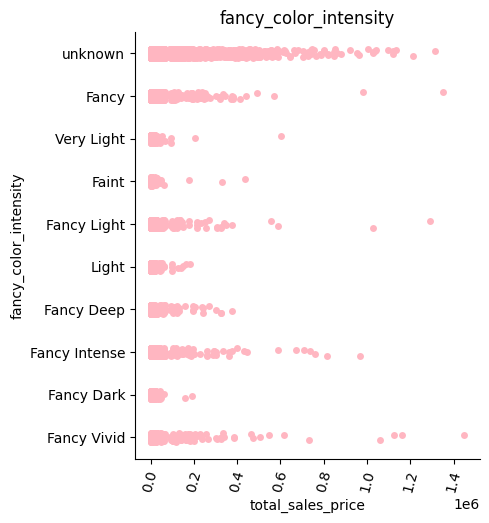

In [12]:
for cat in categorical_columns:
    sns.catplot(df,x='total_sales_price',y=cat,color='#FFB6C1')
    plt.xticks(rotation=75)
    plt.title(cat)
    print(cat +':')
    plt.show()

>It will show PDF(Probalility distribuation function) of the Numeric Attributes and the second plot is a histogram of the count of that Numeric Attribute. As below we can see the histogram and the distribution Function is coming Same at different scales.

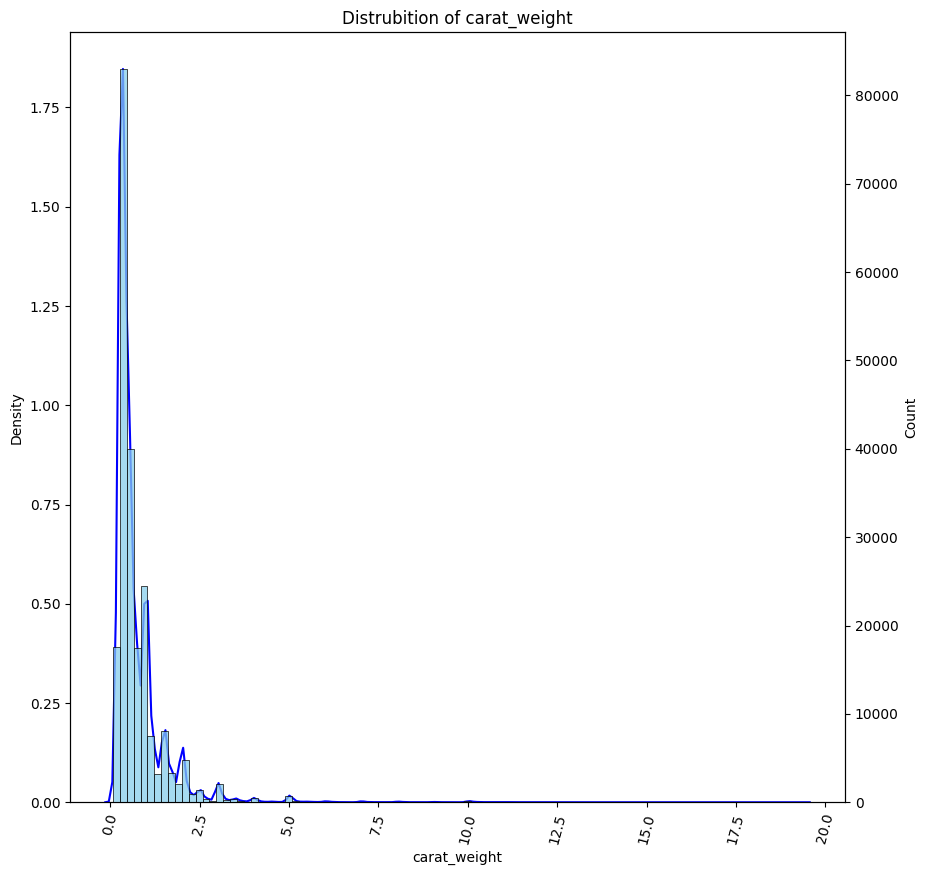

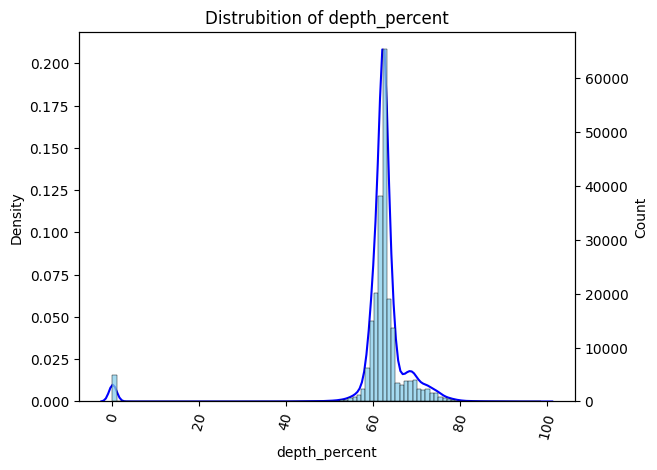

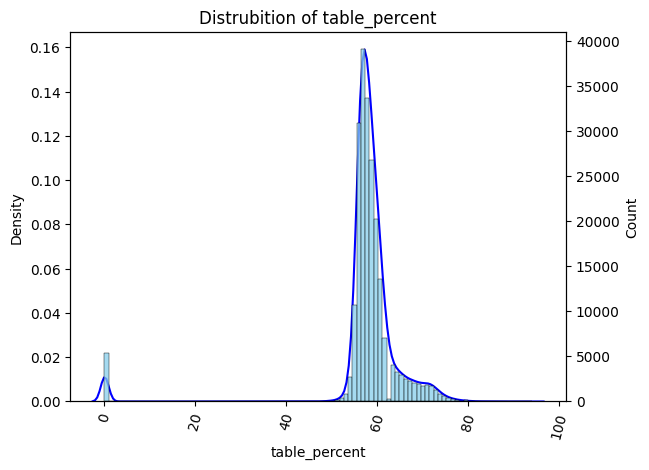

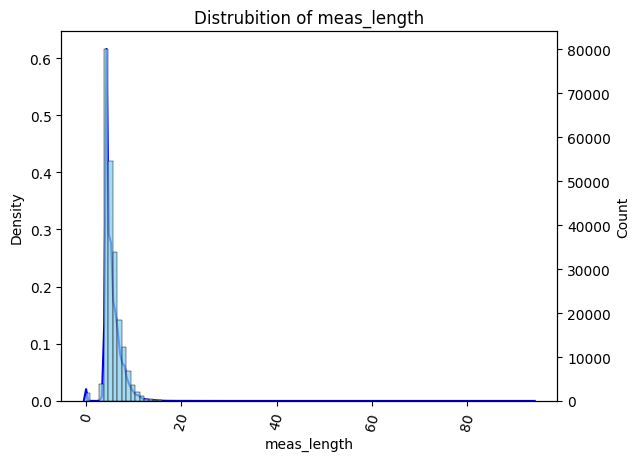

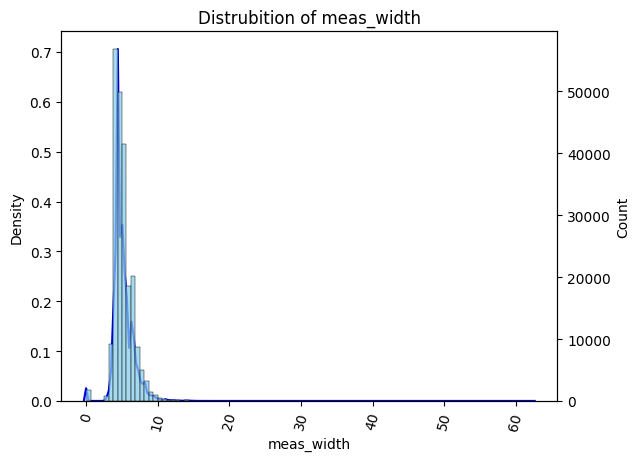

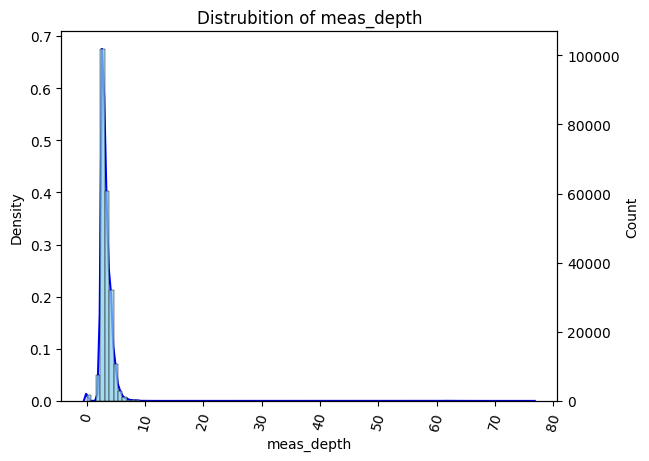

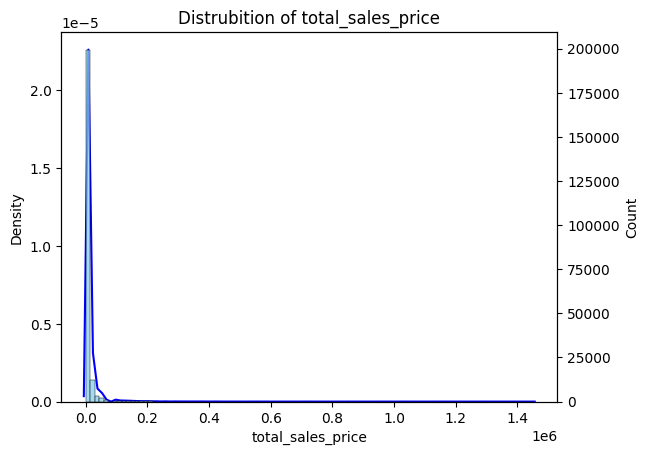

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
for cat in numerical_columns:
    sns.kdeplot(df,x=cat,color='blue')
    plt.xticks(rotation=75)
    plt.title('Distrubition of {}'.format(cat))
    plt.twinx()
    sns.histplot(data=df, x=cat, bins=100,color=pc[5])
    plt.show()
    print()
sns.kdeplot(df,x='total_sales_price',gridsize=100,color='blue')
plt.title('Distrubition of total_sales_price')
plt.twinx()
sns.histplot(data=df, x='total_sales_price', bins=100,color=pc[5])
plt.show()

> This way we can analyse the data where the most of the data are and where the least data are.

#Let's See some of the Outliers. And should we remove  or not ?

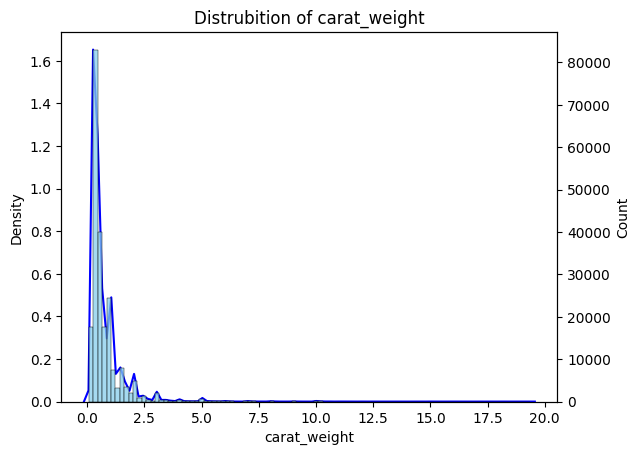

In [14]:
sns.kdeplot(df,x='carat_weight',gridsize=100,color='blue')
plt.title('Distrubition of carat_weight')
plt.twinx()
sns.histplot(data=df, x='carat_weight', bins=100,color=pc[5])
plt.show()

>As per above graph we can there is Some data of selling carte grater than 10 as we can think those can be outlier but there are not becuse some there are some people who are intersed to buy for emaple celebrites,influncer,....
So we cannot consider as Outlier in this case.

> Now let's Detect thr Melee Diamond accroding to GIA a diamond with the carat lessthan 0.2 are consider as Melee Diamods. There is line detecting(Red Line) Diamond having carat_weight less than 0.2 would consider as Melee Diamond.

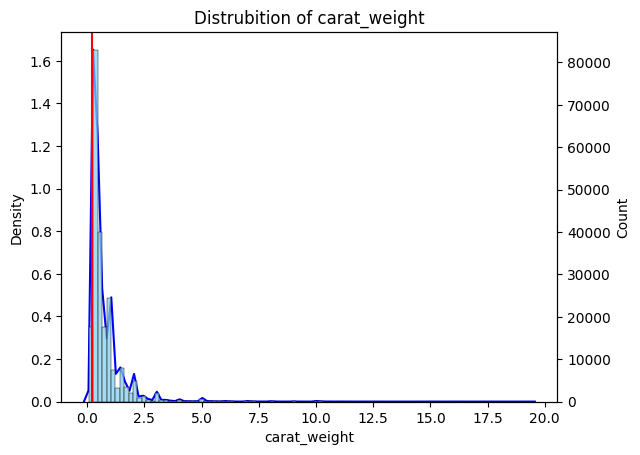

In [15]:
sns.kdeplot(df,x='carat_weight',gridsize=100,color='blue')
plt.title('Distrubition of carat_weight')
plt.twinx()
sns.histplot(data=df, x='carat_weight', bins=100,color=pc[5])
plt.axvline(.2, 0.0, 1,  c='red')
plt.show()

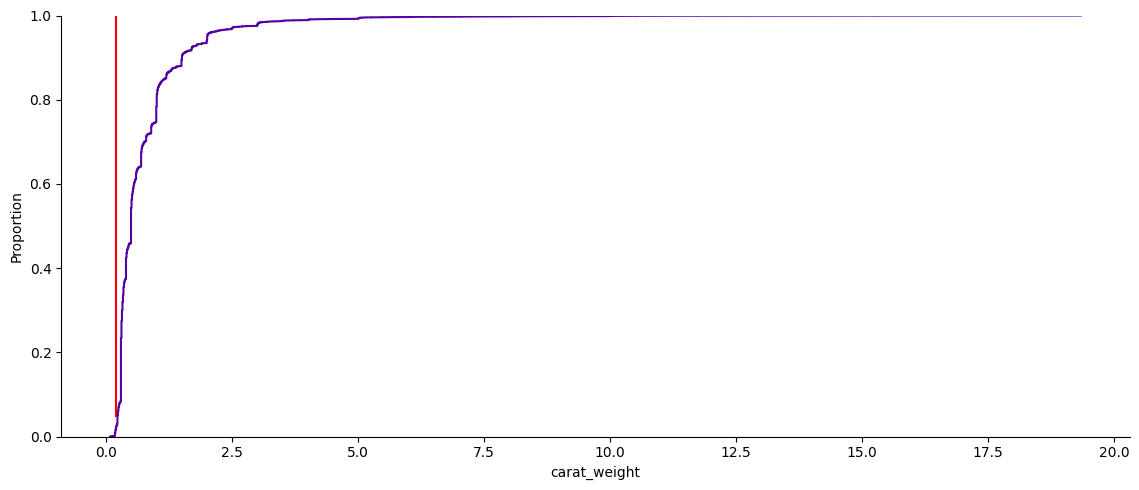

In [16]:
sns.displot(df, x="carat_weight", aspect=2.3,  kind="ecdf")
# melee diamonds (<0.2 carats)
plt.axvline(.2, 0.05, 1, c='red')

>This Melee Diamond are cheapter than other diamonds because they can be fake or the lefover pices from the bigger shaped diamonds so they are usually cheaper.  

>Count of Data Contribution/Participation In Lab Attribute

In [17]:
lab_dist = df["lab"].value_counts()
lab_dist

GIA    200434
IGI     15865
HRD      3404
Name: lab, dtype: int64

>Count of Data Contribution/Participation In Color Attribute

In [18]:
color_dist = df["color"].value_counts()
color_dist

E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: color, dtype: int64

>Count of Data Contribution/Participation In *Clarity* Attribute

In [19]:
clarity_dist = df["clarity"].value_counts()
clarity_dist

SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [20]:
cut_dist = df["cut"].value_counts()
cut_dist

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: cut, dtype: int64

>Pi-Chart of those Attributes with Percentage of Contribution.

<Axes: ylabel='cut'>

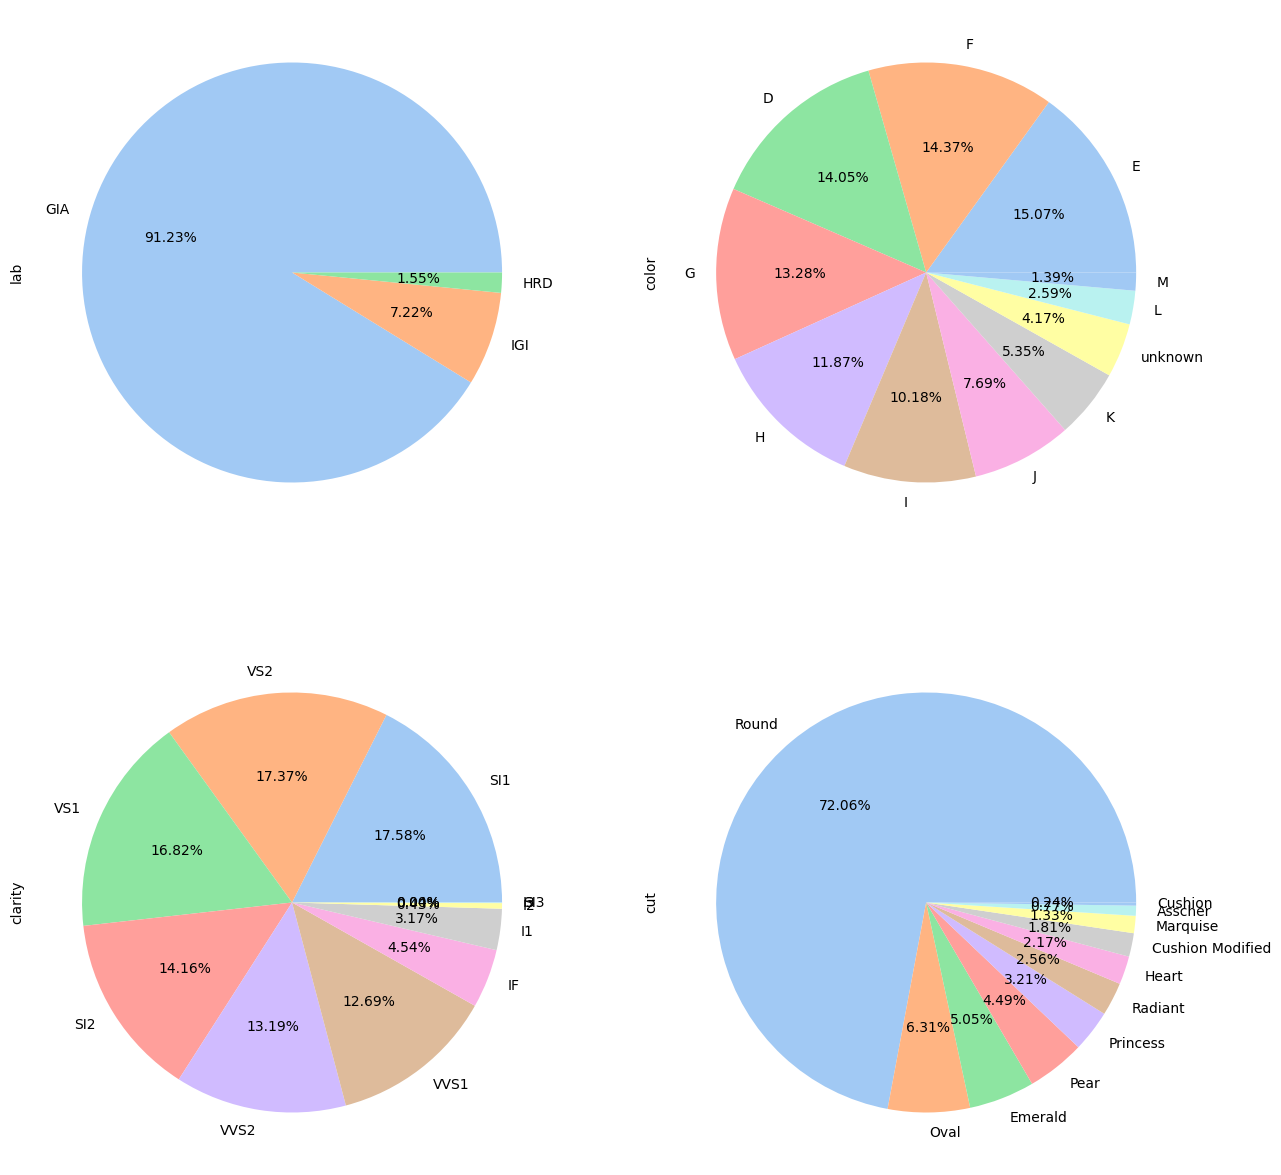

In [21]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
piec_colors = sns.color_palette('pastel')[0:len(lab_dist)]
lab_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 2)
piec_colors = sns.color_palette('pastel')[0:len(color_dist)]
color_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 3)
piec_colors = sns.color_palette('pastel')[0:len(clarity_dist)]
clarity_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 4)
piec_colors = sns.color_palette('pastel')[0:len(cut_dist)]
cut_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')


>Let's See some of the CatPlot with Voiln Kind to seek some of the common observations. Like price-Gap, Carat-Weight Criteria, Calarity etc...

In [22]:
included_diamonds = df.loc[df['clarity'].isin(['I1', 'I2', 'I3','VVS1','VVS2'])]

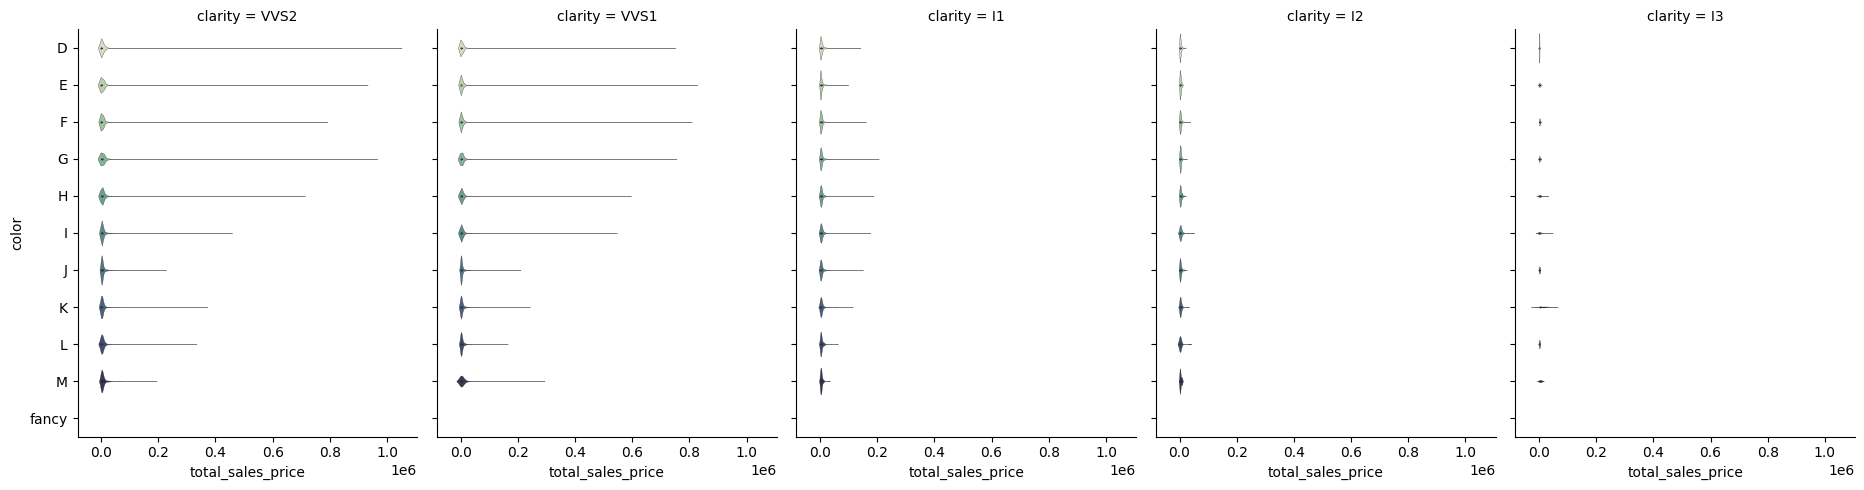

In [23]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(
    data=included_diamonds,
    y="color", x="total_sales_price", order=colors, kind='violin',
    col="clarity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

In [24]:
included_diamonds = df.loc[df['clarity'].isin(['SI2','SI1','VS2','VS1','IF'])]

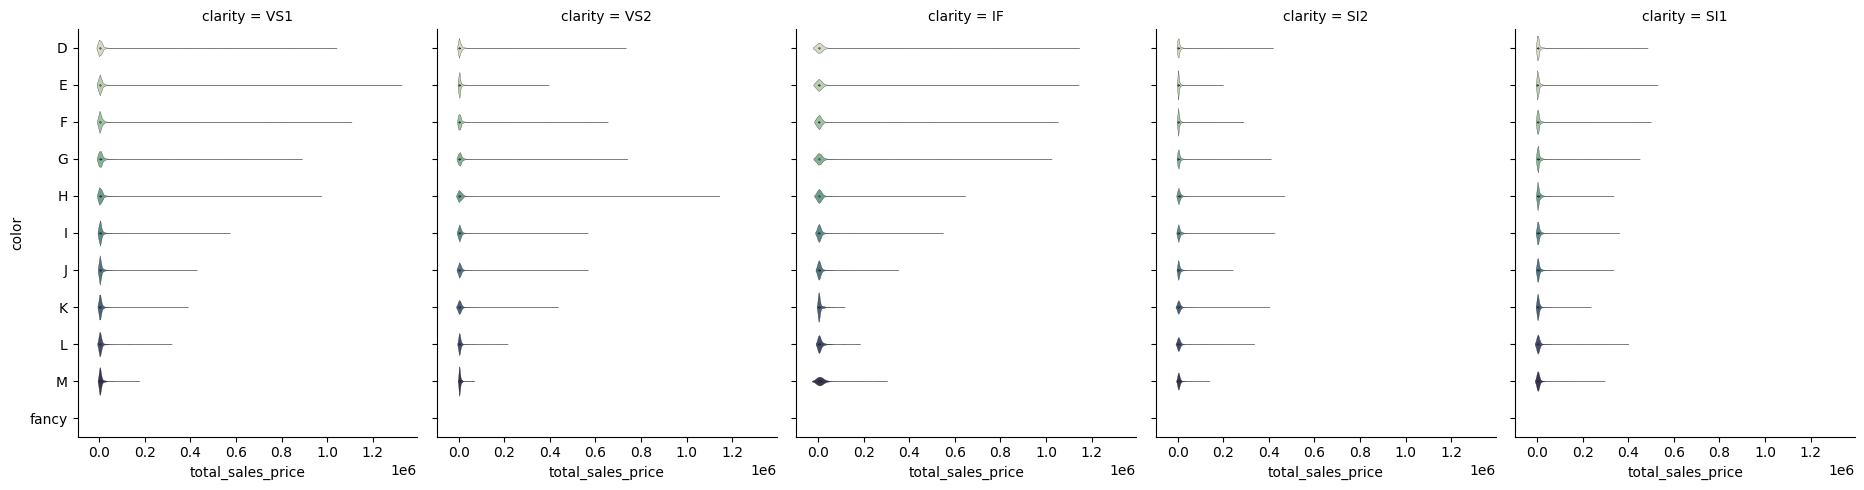

In [25]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(
    data=included_diamonds,
    y="color", x="total_sales_price", order=colors, kind='violin',
    col="clarity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

> Observation of Above Graph: As described per the Description Section VS stands for Very Small, IF stands for Internal Flawness, SI stands for small Inclusion, I for Inclusion, and VVS stands for very very small. Now let's as we can observe Our data does not contain much at the I1, I2, and I3 and they are also not expensive they are cheaper than than the other ones.
><p>As per the graph Most of the expensive and most of the data lays in the VS, VVS, and IF sections. This shows the customer will not prefer to buy a diamond if it contains inclusions. </p>
><p>As per the graph we can also conclude that colorless diamonds are more expensive than colored one in most cases because some can also contain some inclusion and as inclusion increase the selling of Colorless diamond decreases. Here colored diamonds can be sold even with inclusions because the color customers cannot see those are preferred to buy at even higher prices also. </p>

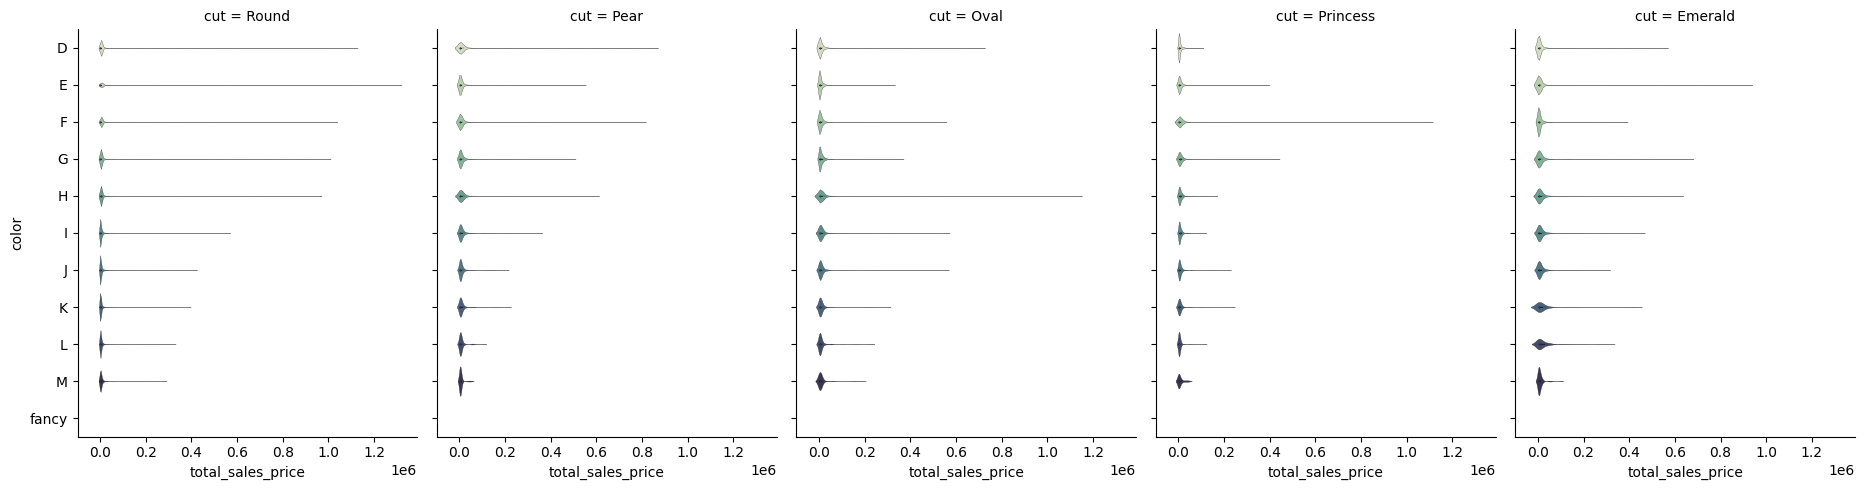

In [26]:
included_diamonds = df.loc[df['cut'].isin(['Round', 'Oval', 'Emerald','Pear','Princess'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(
    data=included_diamonds,
    y="color", x="total_sales_price", order=colors, kind='violin',
    col="cut", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

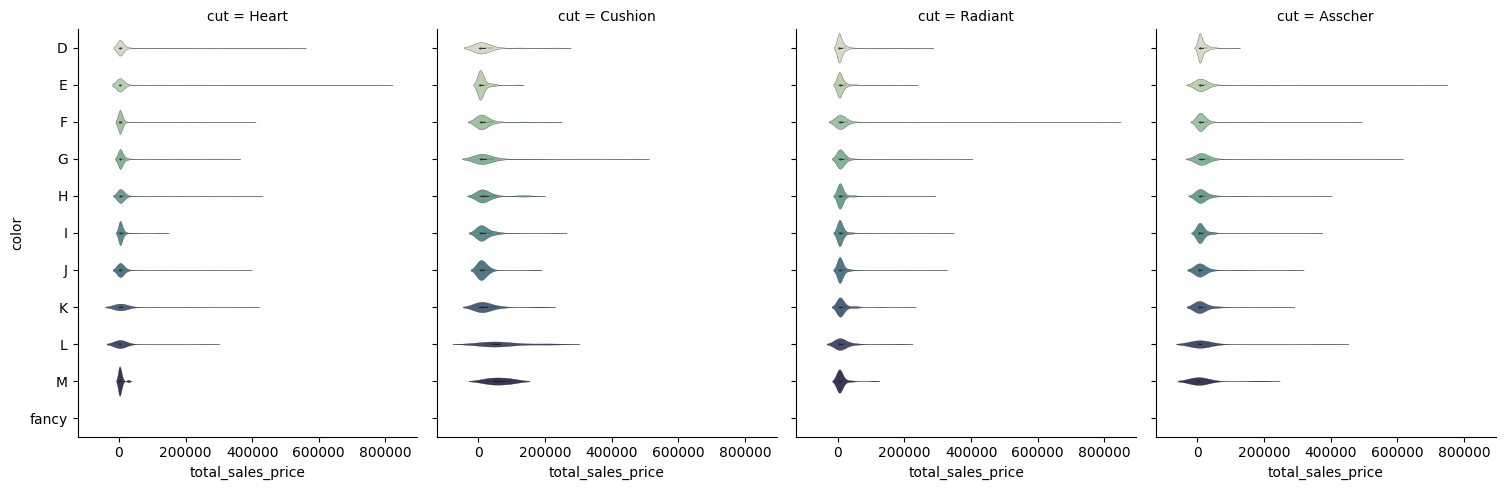

In [27]:
included_diamonds = df.loc[df['cut'].isin(['Heart', 'Cushion', 'Radiant', 'Asscher'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(
    data=included_diamonds,
    y="color", x="total_sales_price", order=colors, kind='violin',
    col="cut", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

>Based on the graph above, the cut attribute indicates the shape of the diamond. The graph shows the relationship between the cut and color, revealing that certain shapes are more expensive in specific colors or are more commonly sold in colored diamonds rather than colorless ones. Additionally, some shapes are more expensive than others.


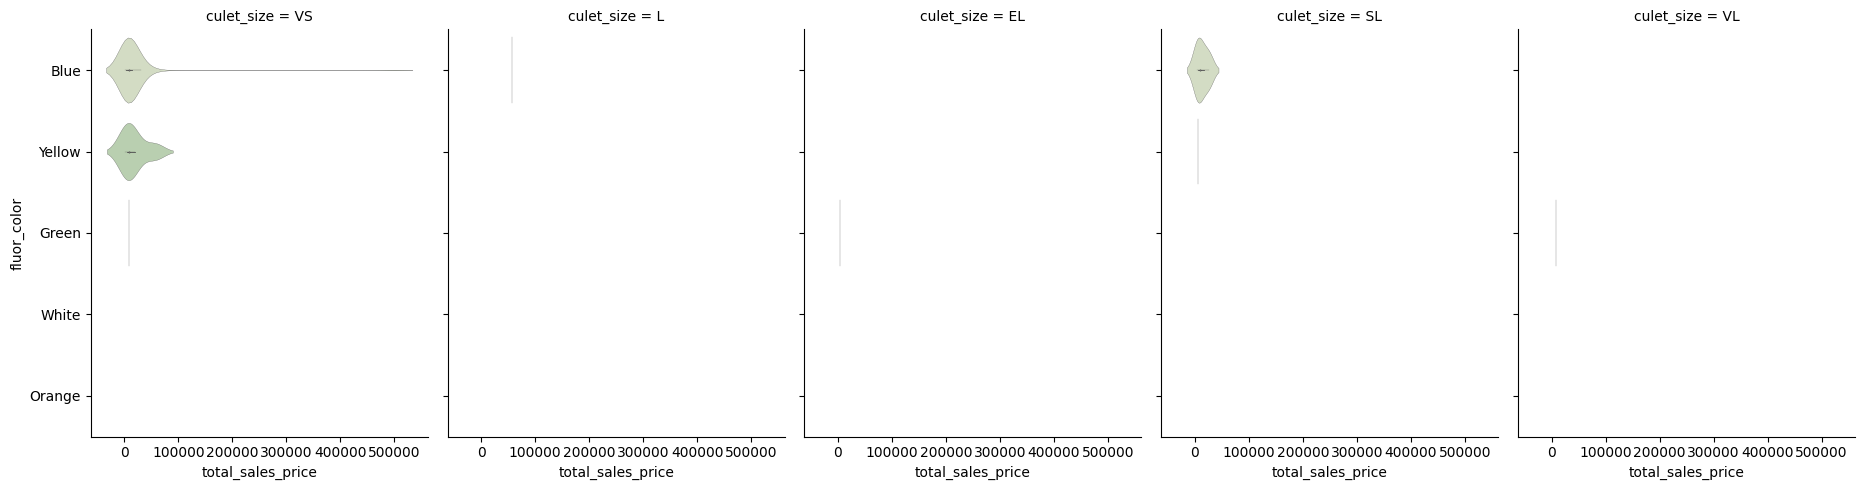

In [28]:
included_diamonds = df.loc[df['culet_size'].isin(['VL', 'SL', 'EL', 'L','VS'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['Blue', 'Yellow', 'Green','White','Orange']
sns.catplot(
    data=included_diamonds,
    y="fluor_color", x="total_sales_price", order=colors, kind='violin',
    col="culet_size", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

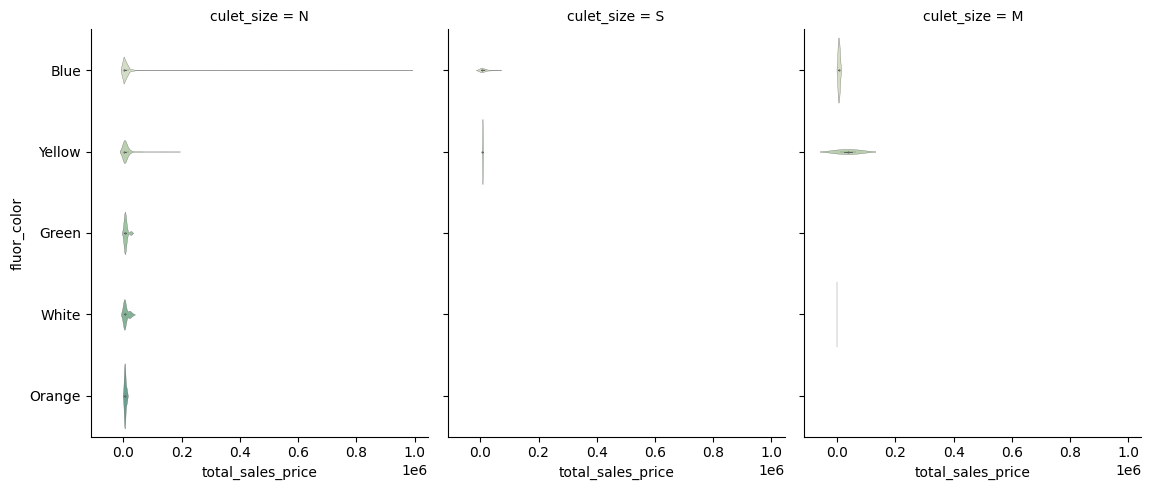

In [29]:
included_diamonds = df.loc[df['culet_size'].isin(['M','S','N'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['Blue', 'Yellow', 'Green','White','Orange']
sns.catplot(
    data=included_diamonds,
    y="fluor_color", x="total_sales_price", order=colors, kind='violin',
    col="culet_size", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

>According to the graph, it seems that customers are more likely to purchase diamonds without a culet. This is because 90% of the data falls under the "None Culet" attribute. Additionally, we can observe that 90% of the data points show diamonds with a blue fluor color, although it is possible to find diamonds with other colors in rare cases.

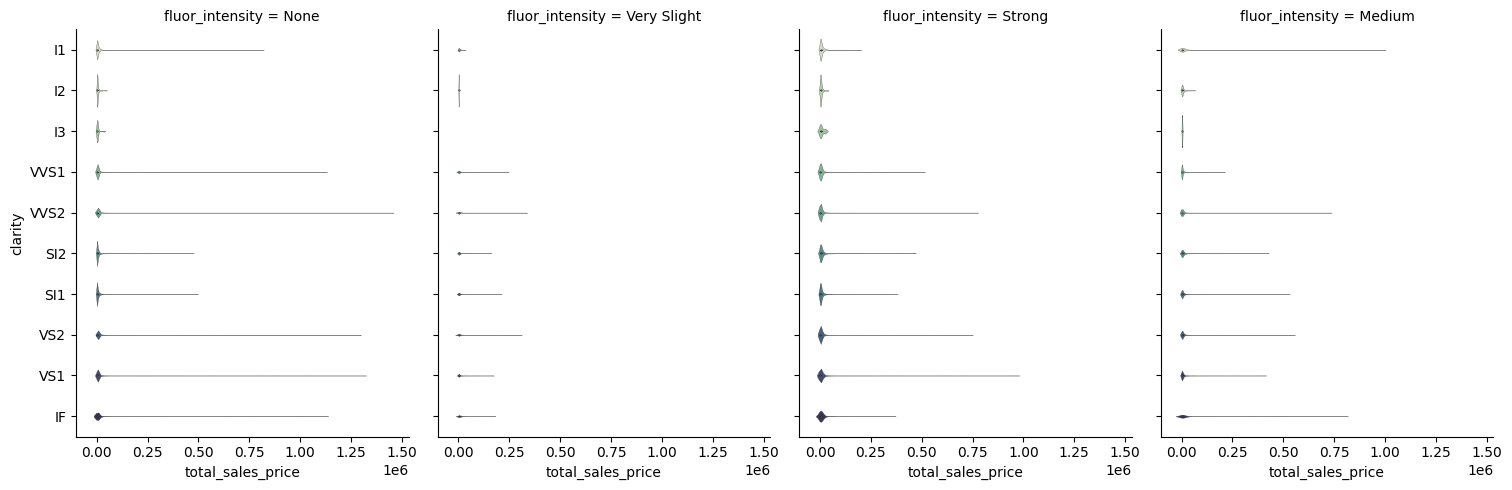

In [30]:
included_diamonds = df.loc[df['fluor_intensity'].isin(['None', 'Very Slight', 'Strong','Medium'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['I1', 'I2', 'I3','VVS1','VVS2','SI2','SI1','VS2','VS1','IF']
sns.catplot(
    data=included_diamonds,
    y="clarity", x="total_sales_price", order=colors, kind='violin',
    col="fluor_intensity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

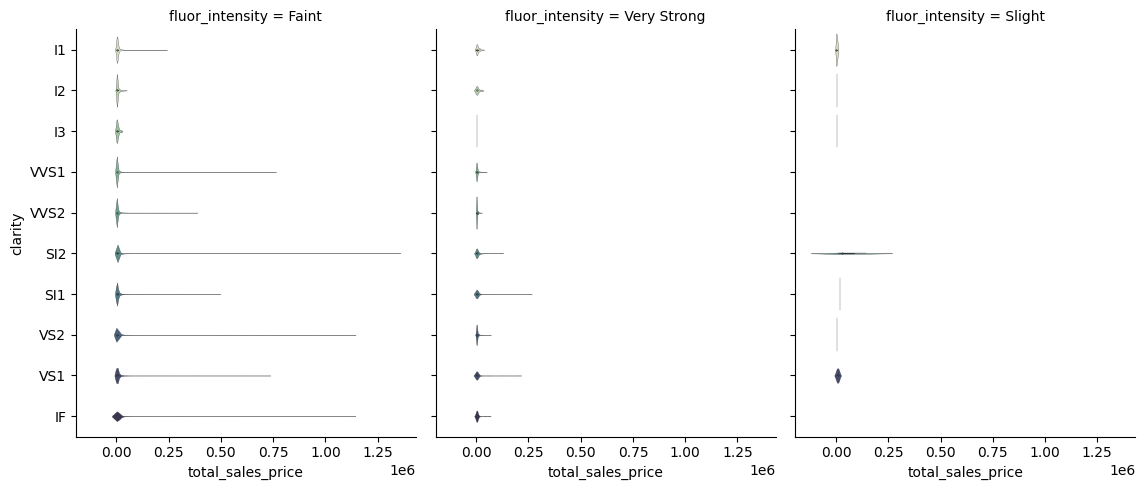

In [31]:
included_diamonds = df.loc[df['fluor_intensity'].isin(['Faint','Very Strong','Slight'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['I1', 'I2', 'I3','VVS1','VVS2','SI2','SI1','VS2','VS1','IF']
sns.catplot(
    data=included_diamonds,
    y="clarity", x="total_sales_price", order=colors, kind='violin',
    col="fluor_intensity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

>Based on Graph, This is showing relation between Fluor_intensity and Clarity and as per GIA some times Diamonds with High inclusion can have Very strong Fluor_intensity and as per graph we can also say the same.

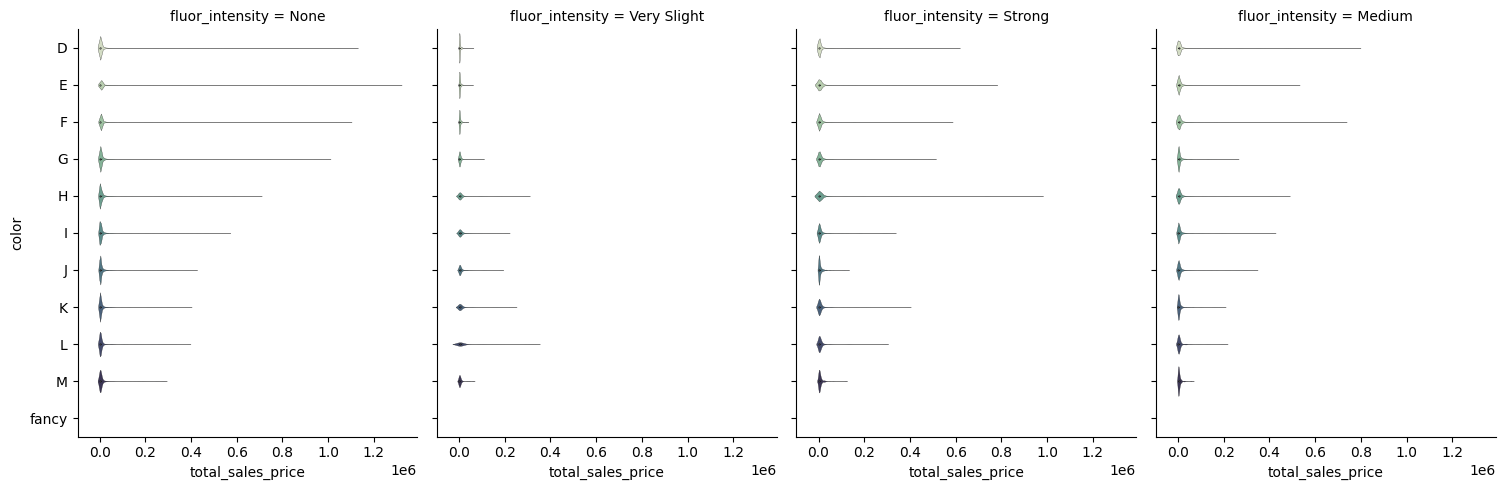

In [32]:
included_diamonds = df.loc[df['fluor_intensity'].isin(['None', 'Very Slight', 'Strong','Medium'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(
    data=included_diamonds,
    y="color", x="total_sales_price", order=colors, kind='violin',
    col="fluor_intensity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

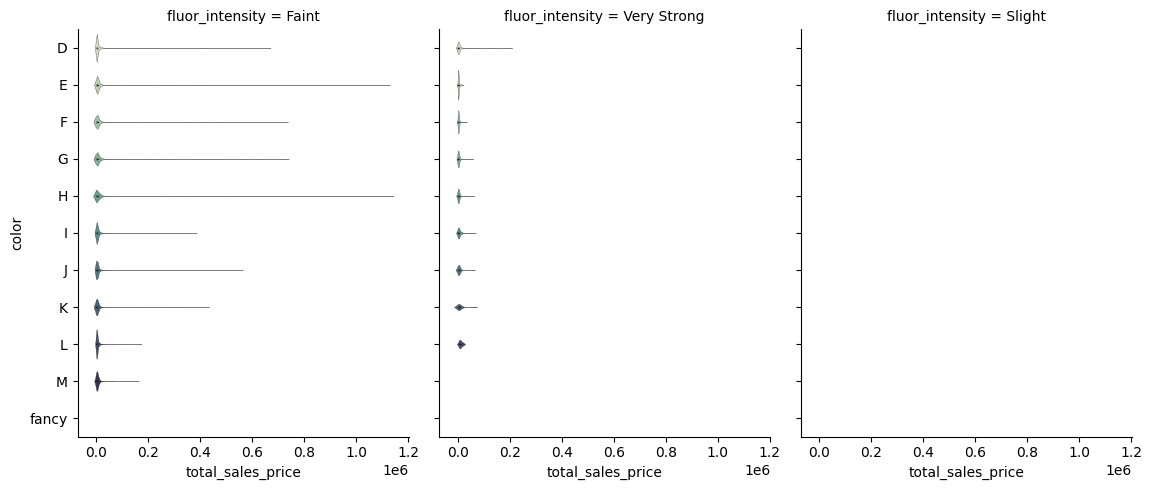

In [33]:
included_diamonds = df.loc[df['fluor_intensity'].isin(['Faint','Very Strong','Slight'])]
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(
    data=included_diamonds,
    y="color", x="total_sales_price", order=colors, kind='violin',
    col="fluor_intensity", col_wrap=5,
    height=5, aspect=.75, linewidth=.2,
)

>Based on the graph, It shows the relation between color and the fluor intensity, and as per GIA with more Intensity diamonds can shine more in the daylight so here we can observe that customers are buying colored diamond with high intensity because flour blue color can make yellow colored diamond white so customers are not able to differentiate between them.

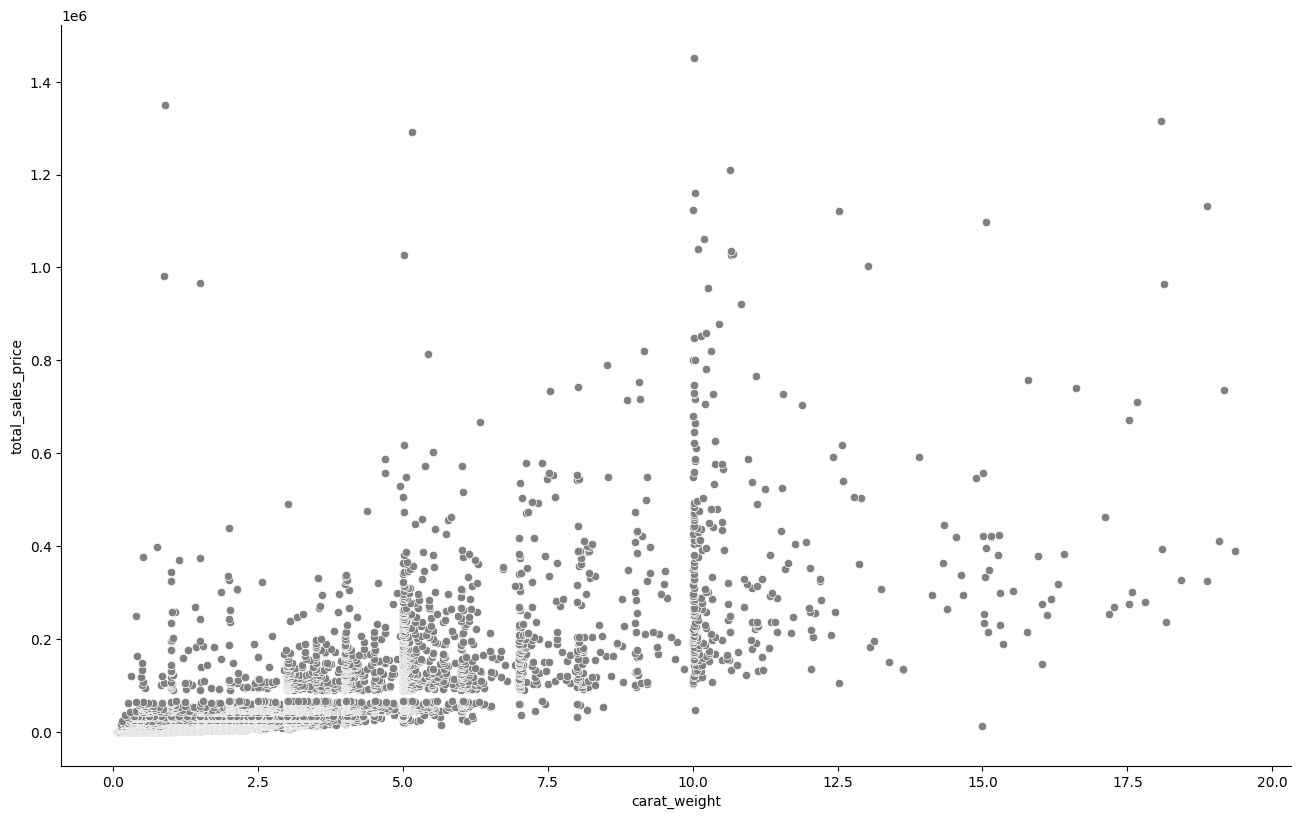

In [34]:
f = sns.relplot( data=df, x="carat_weight", y="total_sales_price",color='grey')
f.figure.set_size_inches(15, 9)

>Based on the above graph, We can observe there can be certain points in which carat weight is being sold. For example, customers prefer to buy diamonds with a carat weight of 2.5 than with 2.2. We buy with certain decimals and this we can see clearly in the above graph and that will apply for the price point also we can see a blank line at 1000$.

In [35]:
gap_analysis = df.loc[df['total_sales_price'].between(0, 25000)]

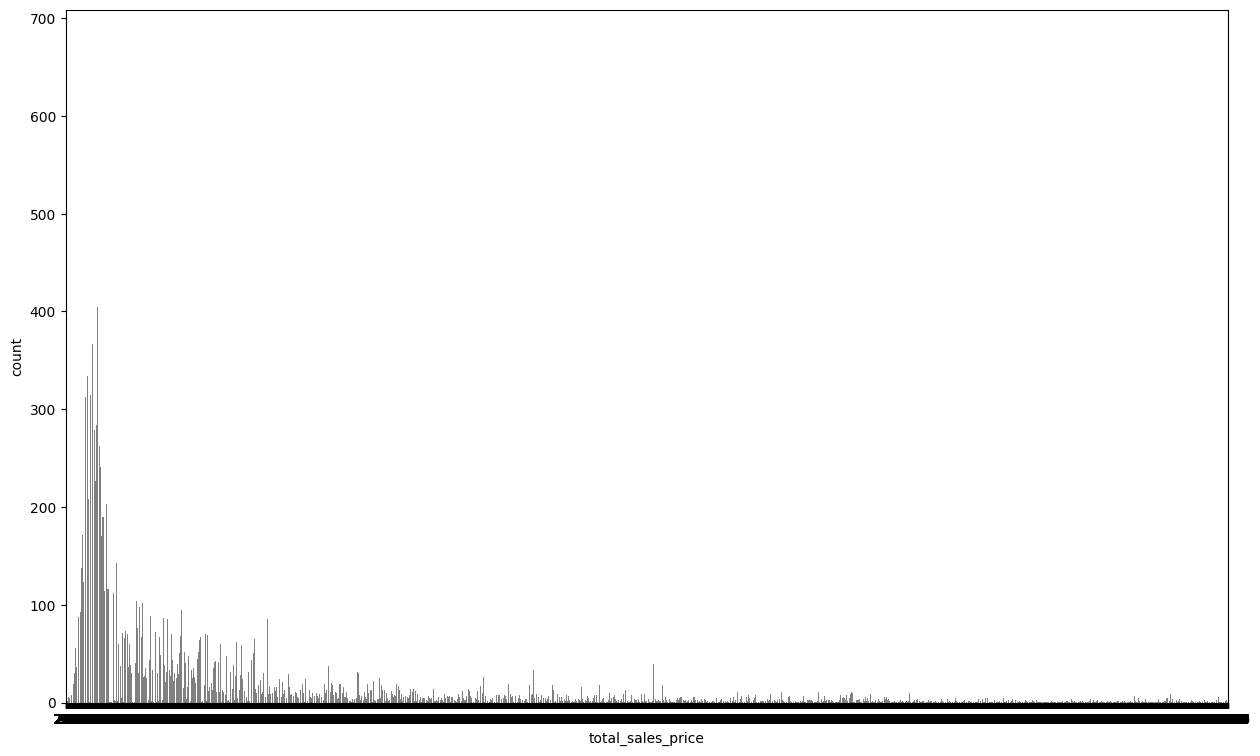

In [36]:
f = sns.countplot(data=gap_analysis, x='total_sales_price', color='grey')
f.figure.set_size_inches(15, 9)

>Here in above graph we taken a price between 0$ to 25000$. And between this price point there are some gaps between them and those gaps are because of Diamonds at certain prices are not begin sell. At certain prices customres are perfering to buying a diamond.

**T2 Identified list regression problems :**

total sales price prediction Predicting the total_sales_price of a diamond is valuable beacuse it is depended on cut quality, color, clarity, Symmetry and Polish. Simply it relies on every attribute

carat_weight prediction carat weight is function of length, width and depth of the diamond.

table percent table percent is function of table width and diameter of diamond. So it can be predicted easily.

Which one does seem the most interesting to you and why?

Predicting the total_sales_price of a diamond is valuable beacuse it is depended on cut quality, color, clarity, Symmetry and Polish. Comparatively total_sales_price relies on every attribute. Total sales price seems most interesting because it allows buyers to make informed purchasing decisions based on price expectations. Sellers can use it to set competitive prices, and investors can assess the potential return on investment in diamonds. Prediction of total sales price helps assess risk in diamond transactions. It can be used to evaluate whether a seller is offering a fair price for a diamond based on its characteristics. If you are in the business of buying or selling diamonds, regression models can help you optimize pricing strategies. Utilizing regression analysis to predict total sales price can give your business a competitive advantage by offering pricing that reflects market dynamics and the value of individual diamonds accurately. And as per the corealtion figure we can see the most relation between the numeric attribute till now is two attributes one is Total_sales_price and second one is carat_weight but carat_weight is direct function of meas_length*meas_width*meas_depth/166 so that will be the and feature diriving from feature and that would be diract solution and that is not a problem. Anf in other hand Total_sales_price is depending on many condition(Attribute) so that would a problem to solve.

#Preprocessing and Transformation

In [37]:
df['volume'] = (df['meas_length']*df['meas_width']*df['meas_depth'])
df['volume']

0           14.641305
1           14.609528
2           14.783040
3           14.661504
4           14.370174
             ...     
219698    1726.551128
219699     581.023905
219700    2975.605200
219701      88.755660
219702    1279.319111
Name: volume, Length: 219703, dtype: float64

>>**Now let us map the values of categorical attribute to numeric values.**

We have following categorical attributes...

 cut, color, clarity, cut_quality, lab, symmetry, polish, eye_clean, culet_size, culet_condition, girdle_min, girdle_max, fluor_color, fluor_intensity, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for cat in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(list(df[cat]))
    df[cat+'_pre'] = df[cat].apply(lambda x: le.transform([x])[0])
    print(df[[cat, cat + '_pre']])

             cut  cut_pre
0          Round       10
1          Round       10
2          Round       10
3          Round       10
4          Round       10
...          ...      ...
219698     Round       10
219699   Radiant        9
219700     Round       10
219701  Princess        8
219702      Pear        7

[219703 rows x 2 columns]
          color  color_pre
0             E          1
1             E          1
2             E          1
3             E          1
4             E          1
...         ...        ...
219698        E          1
219699  unknown         10
219700        E          1
219701  unknown         10
219702  unknown         10

[219703 rows x 2 columns]
       clarity  clarity_pre
0         VVS2           10
1         VVS2           10
2         VVS2           10
3         VVS2           10
4         VVS2           10
...        ...          ...
219698     VS1            7
219699     VS2            8
219700     VS1            7
219701     SI2            5
21

**Now Let us find the correlation among features**


In [39]:
#select only numeric columns
data_df = df[['carat_weight', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth','fancy_color_intensity_pre', 'fancy_color_overtone_pre',
       'fancy_color_secondary_color_pre', 'fancy_color_dominant_color_pre',
       'girdle_max_pre', 'fluor_intensity_pre', 'fluor_color_pre',
       'girdle_min_pre', 'culet_condition_pre', 'cut_pre', 'color_pre',
       'clarity_pre', 'cut_quality_pre', 'lab_pre', 'symmetry_pre',
       'polish_pre', 'eye_clean_pre', 'culet_size_pre']]

<Axes: >

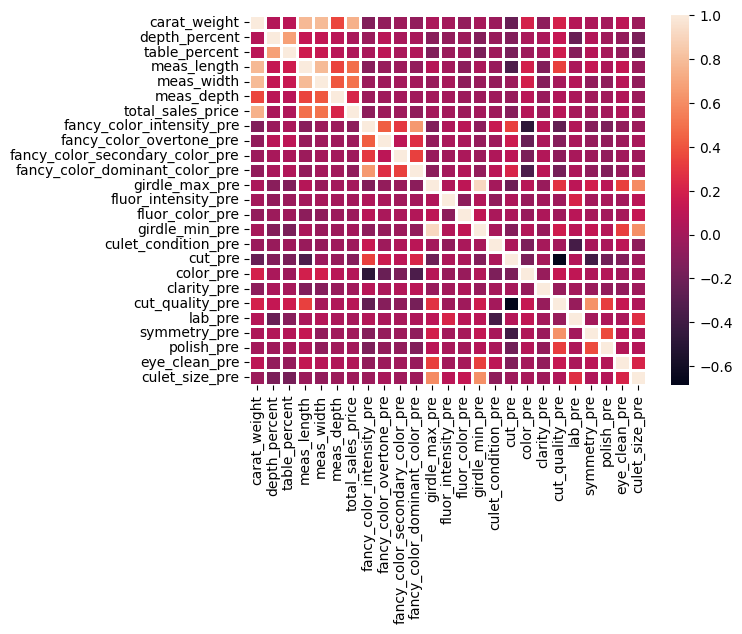

In [40]:
#heatmap
new_df = df[['carat_weight', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth','total_sales_price',
       'fancy_color_intensity_pre', 'fancy_color_overtone_pre',
       'fancy_color_secondary_color_pre', 'fancy_color_dominant_color_pre',
       'girdle_max_pre', 'fluor_intensity_pre', 'fluor_color_pre',
       'girdle_min_pre', 'culet_condition_pre', 'cut_pre', 'color_pre',
       'clarity_pre', 'cut_quality_pre', 'lab_pre', 'symmetry_pre',
       'polish_pre', 'eye_clean_pre', 'culet_size_pre']]
sns.heatmap(data=new_df.corr(), lw = 1)

Significant correlation of total_sales_price with carat_weight, meas_length, meas_width, meas_depth.

We can see that carat_weight is highly correlated with meas_length, meas_width, meas_depth, total_sales_price.


Let us now split the dataset into train-val-test sets



Also We normalize the data to range [-1, 1].

We divide the dataset in two sets.

Training set which is 80% of the dataset

Test set which is of 20%

In [41]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data_df, df["total_sales_price"], random_state=42, test_size=0.20)

In [42]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((175762, 24), (43941, 24))

In [43]:
X_train_scaled

array([[-6.45174943e-01,  4.13723016e-02,  2.41819523e-02, ...,
        -4.97433847e-01,  5.97113628e-01,  1.23995298e+00],
       [-5.38654132e-01,  2.53673161e-01,  1.24922295e-01, ...,
        -4.97433847e-01, -1.41933084e+00,  1.23995298e+00],
       [-2.90105573e-01,  7.38932267e-01,  7.29364351e-01, ...,
         2.03335705e+00, -1.41933084e+00,  1.23995298e+00],
       ...,
       [ 1.12306380e-01,  1.49714962e+00,  5.27883666e-01, ...,
         7.67961603e-01, -1.41933084e+00, -8.09887836e-01],
       [-2.78269927e-01,  1.12139255e-01, -1.77298733e-01, ...,
        -4.97433847e-01,  5.97113628e-01, -8.09887836e-01],
       [-3.01941219e-01,  9.34042748e-04,  3.26402981e-01, ...,
        -4.97433847e-01, -1.41933084e+00, -8.09887836e-01]])

In [44]:
X_test_scaled

array([[ 0.28984107,  0.18290621, -0.17729873, ..., -0.49743385,
         0.59711363, -0.80988784],
       [-0.51498284,  0.02115317,  0.1249223 , ..., -0.49743385,
        -1.41933084,  1.23995298],
       [ 0.28984107, -0.23158595,  0.32640298, ..., -0.49743385,
         0.59711363,  1.23995298],
       ...,
       [ 1.13017191,  0.71871314,  1.53528709, ...,  2.03335705,
         0.59711363, -0.80988784],
       [-0.53865413,  0.09192013, -0.07655839, ..., -0.49743385,
        -1.41933084, -0.80988784],
       [-0.00605008,  0.16268708, -5.81875793, ..., -0.49743385,
         0.59711363,  1.23995298]])

In [47]:
score_type = ["neg_mean_absolute_error", "neg_mean_squared_error"]
degrees = [1,2]

In [48]:
diamonds=X_train_scaled

In [49]:
price=y_train
diamonds_test = X_test
price_test = y_test

# Regression Model building

In [ ]:
lin_reg = LinearRegression()

In [ ]:
model_results = pd.DataFrame()
model_results['Train_MAE'] = None
model_results['Train_RMSE'] = None
model_results['Validation_MAE'] = None
model_results['Validation_RMSE'] = None

In [ ]:
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    diamonds_poly = poly_features.fit_transform(diamonds)

    score = cross_validate(lin_reg, diamonds_poly, price, scoring=score_type, cv=5, return_train_score=True, verbose=1)

    train_rmse = np.sqrt(-score['train_neg_mean_squared_error']).mean()
    train_mae = (-score['train_neg_mean_absolute_error']).mean()
    validation_rmse = np.sqrt(-score['test_neg_mean_squared_error']).mean()
    validation_mae = (-score['test_neg_mean_absolute_error']).mean()

    model_results.loc["Polynomial_Regression " + str(degree) , ['Train_RMSE', 'Train_MAE', 'Validation_RMSE', 'Validation_MAE', "best_params"]] = [train_rmse, train_mae, validation_rmse, validation_mae, degree]


<ul style="font-size: 18px">
    <li>Here we can see the result of the Linear Regression and Polynomial Regression of degree 2 using cross validation method.</li>
</ul>

In [ ]:
model_results

Train_MAE    Train_RMSE Validation_MAE  \
Polynomial_Regression 1  3936.702076  15969.789345    3941.167788   
Polynomial_Regression 2  2417.015481  11673.287285    2481.228431   

                        Validation_RMSE  best_params  
Polynomial_Regression 1    15991.113191          1.0  
Polynomial_Regression 2    12669.507894          2.0

<ul style="font-size: 18px">
    <li>Now, let's evaluate different models like, Decision Tree, Random Forest and XGB using their predefined parameters.</li>
</ul>

In [ ]:
models = {
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}

In [ ]:
for model_name, model in models.items():
    model_score = cross_validate(model, diamonds, price, scoring=score_type, cv=5, return_train_score=True, verbose=1)
    train_rmse = np.sqrt(-model_score['train_neg_mean_squared_error']).mean()
    train_mae = (-model_score['train_neg_mean_absolute_error']).mean()
    validation_rmse = np.sqrt(-model_score['test_neg_mean_squared_error']).mean()
    validation_mae = (-model_score['test_neg_mean_absolute_error']).mean()

    model_results.loc[model_name , ['Train_RMSE', 'Train_MAE', 'Validation_RMSE', 'Validation_MAE']] = [train_rmse, train_mae, validation_rmse, validation_mae]

<ul style="font-size: 18px">
    <li>Here we can see the result of all of the models we've used so far.</li>
</ul>

In [ ]:
model_results

Train_MAE    Train_RMSE Validation_MAE  \
Polynomial_Regression 1  3936.702076  15969.789345    3941.167788   
Polynomial_Regression 2  2417.015481  11673.287285    2481.228431   
DecisionTreeRegressor       0.304939     29.488826    1286.470249   
RandomForestRegressor      374.04915   3808.901294     1017.19481   
XGBRegressor              573.607392   1709.968829    1005.072271   

                        Validation_RMSE  best_params  
Polynomial_Regression 1    15991.113191          1.0  
Polynomial_Regression 2    12669.507894          2.0  
DecisionTreeRegressor      13683.045822          NaN  
RandomForestRegressor      10673.824888          NaN  
XGBRegressor                9135.049009          NaN

<ul style="font-size: 18px">
    <li>As we can see above, Random Forest and XGB models have less RMSE values than all of the other models.</li>
    <li>We can also see that, Train RMSE is much lower than Validation_RMSE in DecisionTreeRegressor, RandomForestRegressor and XGBRegressor. This represents the overfitting in the model.</li>
    <li>So, now let's fine tune these two models to get the better parameters for these models.</li>
    <li>We've used different paramaters for both of these models to get the best score out of it!</li>
</ul>

# Hyperparameter Tuning

In [ ]:
model_dict = {
    "RandomForestRegressor": {'model': RandomForestRegressor(random_state=42),
                             'params': {'n_estimators': list(range(5,50, 5)), 'max_depth': list(range(1, 10, 2)),
                                         'min_samples_split': [2, 5, 10]}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'max_depth': [6, 7, 9],
                                                         'n_estimators': list(range(100, 800, 100)),
                                                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                                                        'subsample': [0.2, 0.3, 0.4],
                                                        'gamma': [0, 0.5, 0.6, 0.7],
                                                        'reg_lambda': [0, 1, 5, 10]}}
}

In [ ]:
def hyperparameter_tuning():

    best_model = None
    best_score = -math.inf

    for model_name, reg_model in model_dict.items():

        hyper_tuning_model = RandomizedSearchCV(reg_model['model'], reg_model['params'], n_iter=10, n_jobs=-1, cv=5, return_train_score=True, verbose=2, scoring=score_type, refit="neg_mean_squared_error")
        hyper_tuning_model.fit(diamonds, price)

        model_res = hyper_tuning_model.best_estimator_
        best_model_score = hyper_tuning_model.best_score_

        res = hyper_tuning_model.cv_results_

        print(model_name, " :: ", best_model_score, hyper_tuning_model.best_params_)

        if best_model_score > best_score:
            best_score = best_model_score
            best_model = model_res

    print("Best Model :: ", best_model)

    return best_model

<ul style="font-size: 18px">
    <li>The function mentioned above is used for hyperparameter tuning for given model.</li>
    <li>There are two methods in the sklearn library, to find the best parameters of any given model. GridSearchCV and RandomisedSearchCV</li>
    <li>Due to the large size of the datasize, we've used RandomisedSearchCV with 10 parameters sampled for each model.</li>
    <li>We've determined the best model using the one with the highest score in RandomisedSearchCV.</li>
</ul>

In [ ]:
best_model = hyperparameter_tuning()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForestRegressor  ::  -134002027.78386426 {'n_estimators': 25, 'min_samples_split': 10, 'max_depth': 7}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBRegressor  ::  -77196889.70919968 {'subsample': 0.4, 'reg_lambda': 5, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0}
Best Model ::  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=Non

<ul style="font-size: 18px">
    <li>As shown above, the score for XGBRegressor is higher than the RandomForestRegressor.</li>
    <li>So, from the RandomisedSearchCV, we got the best parameters as shown above for each of the model.</li>
    <li>We've also returned the best model from the function which we can use to find the model's perforamnce on our test dataset.</li>
</ul>

# Evaluation

In [ ]:
price_predict = best_model.predict(diamonds_test)

In [ ]:
price_mse = mean_squared_error(price_test, price_predict)
price_rmse = np.sqrt(price_mse)

In [ ]:
price_rmse

8147.250629439233

In [ ]:
price_r2 = r2_score(price_test, price_predict)
price_r2

0.8943280110517966

<ul style="font-size: 18px">
    <li>We can see the RMSE value of our model in test dataset as shown above.</li>
    <li>The R2 score for our model on test dataset is also shown, which lies from 0 to 1.</li>
</ul>

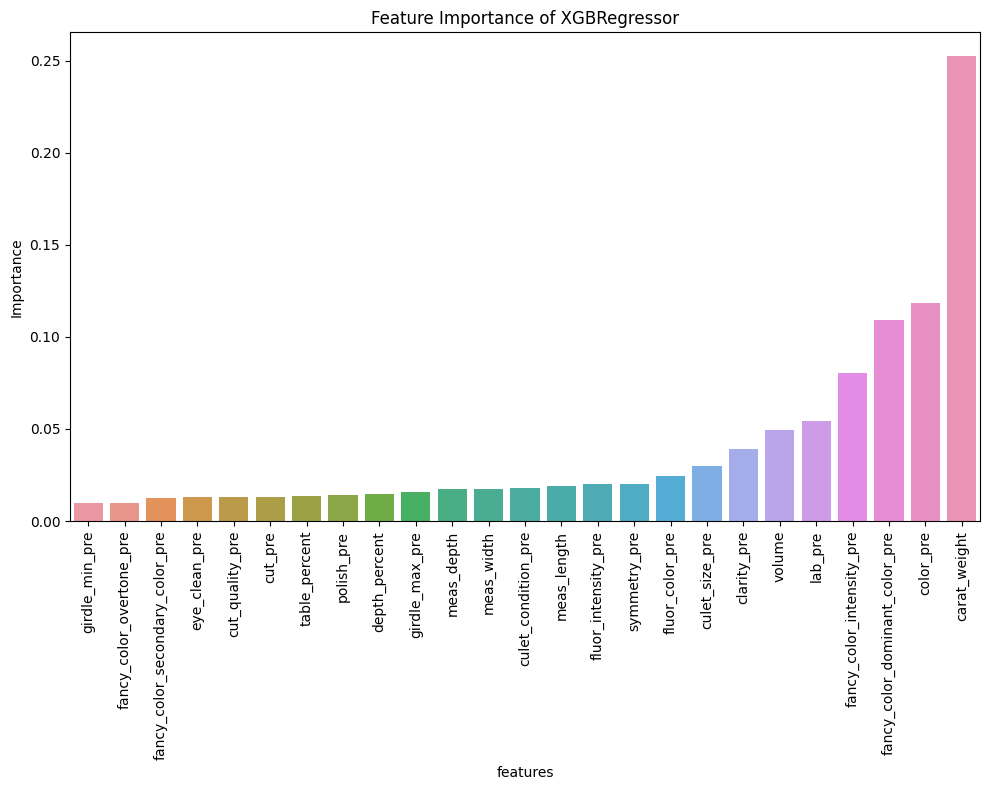

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['Importance'] = best_model.feature_importances_
feature_importance['features'] = np.array(cols)

feature_importance = feature_importance.sort_values('Importance', ascending=True).reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=feature_importance, x='features', y='Importance', ax=ax, order=feature_importance['features'])
ax.set_title("Feature Importance of XGBRegressor")
plt.xticks(rotation = 90)
fig.tight_layout()

<ul style="font-size: 18px">
    <li>Here we can see the feature importance of features for our dataset.</li>
    <li>As shown above, carat weight has the highest importance of all to determine the price of the diamond!</li>
</ul>

In [ ]:
from scipy import stats
from statistics import stdev

In [ ]:
confidence = 0.95
squared_errors = (price_predict - price_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([ 4888.23604618, 10433.62516073])

<ul style="font-size: 18px">
    <li>Here we can see the 95% value of the errors in the dataset.</li>
    <li>It shows that the 95% of the error lies between these two values!</li>
</ul>

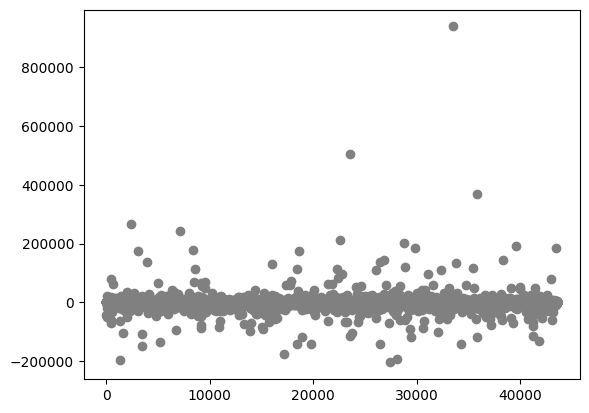

In [ ]:
plt.plot(list(price_test)-price_predict, marker='o', linestyle='', color='gray')